<a href="https://colab.research.google.com/github/Athul64/Student-Mental-Health/blob/main/Final_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📊 Student Mental Health: Identifying Key Predictors of Depression with Machine Learning**


---




![An image](https://image.cnbcfm.com/api/v1/image/105171976-Hard_studying.jpg?v=1532563647)






## **📌 Overview**
This dataset focuses on analyzing factors influencing student mental health, particularly identifying key predictors of depression. It contains **27,901 records** and **19 features**, covering demographics, academic/work stress, lifestyle habits, and mental health indicators. This dataset is valuable for building machine learning models to predict depression risk and gain insights into student well-being.

---

## **📂 Dataset Description**
Each feature in the dataset provides a unique perspective on students' mental health and well-being.

### **1️⃣ Demographics**
These features help understand the general background of students:

- **ID**: Unique identifier for each student.

- **Gender**: Categorized as Male/Female.

- **Age**: The age of the student (Numerical value).

- **City**: The city where the student resides (Categorical).

- **Profession**: Defines whether the person is a **student** or a **working professional**.

- **Degree**: The academic degree currently pursued (e.g., Bachelor's, Master's, PhD).

### **2️⃣ Academic & Work-Related Factors**
These attributes capture the academic and professional stress experienced by students:
- **Academic Pressure**: A scale from **1 (Low) to 5 (High)** indicating academic stress.

- **Work Pressure**: A scale from **1 (Low) to 5 (High)** indicating stress from work.

- **CGPA**: Cumulative Grade Point Average (ranges from 0.0 to 4.0 or 10.0, depending on the system).

- **Study Satisfaction**: A self-reported score from **1 (Not Satisfied) to 5 (Highly Satisfied)**.

- **Job Satisfaction**: Similar to study satisfaction but for working students, rated **1-5**.

- **Work/Study Hours**: The number of hours spent working or studying daily.

### **3️⃣ Lifestyle Factors**

These features assess lifestyle habits that could impact mental health:

- **Sleep Duration**:

  - **Less than 5 hours**

  - **5-6 hours**

  - **7-8 hours** (Recommended)

  - **More than 8 hours**

- **Dietary Habits**:

  - **Healthy**: Balanced diet with proper nutrition.

  - **Moderate**: Occasionally unhealthy eating habits.

  - **Unhealthy**: Poor dietary patterns with fast food consumption.

- **Financial Stress**: Scale from **1 (No stress) to 5 (Severe financial stress)**.

### **4️⃣ Mental Health Indicators**

These are critical attributes that help assess a student’s mental health status:

- **Have you ever had suicidal thoughts?** (Yes/No) - A crucial indicator of mental distress.

- **Family History of Mental Illness** (Yes/No) - Whether the student has a known family history of mental health disorders.

- **Depression (Target Variable)**:

  - **1 = Depressed**

  - **0 = Not Depressed**

  - This is the variable we aim to predict using machine learning.



## **Importing necessary libraries**


In [1]:
import kagglehub # Used for fetching dataset from
import numpy as np  # Used for numerical operations, including arrays and mathematical functions.
import pandas as pd  # A library for handling structured data using DataFrames.
import matplotlib.pyplot as plt  # A plotting library for creating visualizations.
import seaborn as sns  # A statistical visualization library based on Matplotlib.
from sklearn.preprocessing import OneHotEncoder # Encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

## **Dataset Selection**

In [6]:
try:
    # Reading the CSV dataset by using API
    # Download dataset
    path = kagglehub.dataset_download("athulkrishna03/student-depression")
    # Load CSV
    data = pd.read_csv(path + "/Student Depression Dataset.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'Student Depression Dataset.csv' not found. Please ensure the file is in the correct location.")

# Display the few random rows
data.sample(5)

100%|██████████| 454k/454k [00:00<00:00, 93.1MB/s]

Extracting files...
Dataset loaded successfully!


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
6299,31562,Male,33.0,Rajkot,Student,2.0,0.0,7.94,4.0,0.0,Less than 5 hours,Moderate,B.Ed,No,10.0,2.0,No,0
11738,59283,Male,24.0,Surat,Student,1.0,0.0,7.11,2.0,0.0,Less than 5 hours,Healthy,MSc,Yes,8.0,3.0,No,1
15518,78361,Female,18.0,Lucknow,Student,3.0,0.0,7.34,5.0,0.0,More than 8 hours,Moderate,Class 12,Yes,4.0,4.0,Yes,1
9874,49856,Male,26.0,Jaipur,Student,1.0,0.0,8.70,5.0,0.0,Less than 5 hours,Unhealthy,B.Ed,No,4.0,5.0,No,0
11582,58506,Female,24.0,Hyderabad,Student,4.0,0.0,9.79,2.0,0.0,Less than 5 hours,Moderate,B.Arch,Yes,11.0,3.0,Yes,1


**📌 Insight :**

**Download Dataset from Kaggle**
* Fetches the latest version of your dataset from Kaggle.
* Downloads it automatically without needing manual uploads.
* The dataset is saved in a temporary directory within the Colab environment.

**Load Dataset into Pandas**

* Reads the CSV file into a Pandas DataFrame (data) for analysis.
* Displays the first few random rows using data.sample() to verify successful loading.

## **Explore the Data**

In [7]:
# Display the number of rows and columns
print("The Number of Rows :", data.shape[0])
print("The Number of Columns :", data.shape[1])

The Number of Rows : 27901
The Number of Columns : 18


**📌 Insight :**

**Dataset Overview**
* Rows: 27,901
* Columns: 18
* Depression Label: Binary (0 = No Depression, 1 = Depression)

In [8]:
# Understand the dataset structure.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

**📌 Insight :**

**Observations from Your DataFrame Info:**
* Total Entries: 27,901 rows
* Columns: 18 total
* Missing Values:
  * `Financial Stress` has 3 missing values (27898 non-null out of 27901).

**Data Type Breakdown:**
* Numerical Columns (`Float/Int`) → 10
  * `Age`, `Academic Pressure`, `Work Pressure`, `CGPA`, `Study Satisfaction`, `Job Satisfaction`, `Work/Study Hours`, `Financial Stress`, `Depression` (`int`), `id` (`int`)
* Categorical Columns (`Object`) → 8
  * `Gender`, `City`, `Profession`, `Sleep Duration`, `Dietary Habits`, `Degree, Suicidal Thoughts`, `Family History of Mental Illness`

In [9]:
# Get statistical insights.
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


**📌 Insight :**

**1. Age Distribution**
* Mean Age: 25.82 years
* Min Age: 18, Max Age: 59
25th Percentile (Q1): 21, 75th Percentile (Q3): 30
* Observation: Most participants are young adults (between 21-30). Outliers (age > 50) should be reviewed.

**2. Academic Pressure (Scale: 0-5)**
* Mean: 3.14, Std Dev: 1.38
* Min: 0 (No pressure), Max: 5 (Extreme pressure)
* Median (50%): 3
* Observation: A balanced distribution, but possible outliers at 0 and 5.

**3. Work Pressure (Suspicious Values?)**
* Mean: 0.00043, Std Dev: 0.0439
* Min: 0, Max: 5
* Observation: The values are very low compared to expected work pressure values (0-5 scale). Check if this column is incorrectly encoded (e.g., should it be categorical instead?).

**4. CGPA Distribution**
* Mean: 7.66, Std Dev: 1.47
* Min: 0 (Potentially incorrect?), Max: 10
* Median: 7.77
* Observation: Normal CGPA range, but a CGPA of 0 is highly unusual. Verify data quality.

**5. Study Satisfaction (Scale: 0-5)**
* Mean: 2.94, Std Dev: 1.36
* Min: 0, Max: 5
* Observation: Many students may have neutral or low satisfaction. Check correlation with CGPA.

**6. Job Satisfaction (Suspicious Values?)**
* Mean: 0.00068, Std Dev: 0.0443
* Min: 0, Max: 4
* Observation: Very low mean value! Likely an incorrect encoding issue. Verify data.

**7. Work/Study Hours**
* Mean: 7.15 hours, Std Dev: 3.70
* Min: 0, Max: 12
* Observation: A reasonable work/study hour distribution, but values near 0 should be checked.

**8. Financial Stress (Scale: 1-5)**
* Mean: 3.13, Std Dev: 1.43
* Min: 1, Max: 5
* Observation: Financial stress is generally moderate.

**9. Depression (Binary: 0 = No, 1 = Yes)**
* Mean: 0.585 (~58.5% report depression)
* Std Dev: 0.49
* Observation: High prevalence of depression. Needs further analysis with financial stress, study satisfaction, and suicidal thoughts.

In [10]:
# Check for duplicate records.
data.duplicated().sum()

np.int64(0)

**📌 Insight :**
* The dataset contains no duplicate values.

In [11]:
# Irrelevant Features
data.drop(columns=['id','City','Degree'], inplace=True)

# Standardize categorical value of Gender
data.replace({'Male': 'M', 'Female': 'F'},inplace=True)

# checking the dataset
data.head()

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,M,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1
1,F,24.0,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0
2,M,31.0,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0
3,F,28.0,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,Yes,4.0,5.0,Yes,1
4,F,25.0,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,Yes,1.0,1.0,No,0


**📌 Insight:**

**Irrelevant Features to Drop for Predicting Depression:**
* Removes unnecessary columns (`id, City, Degree`) that might not contribute to analysis.
* This helps focus on relevant features, improving model performance if used for predictions.


**Standardizing Categorical Columns:**
* Converts `'Male'` → `'M'` and `'Female'` → `'F'` for uniformity.
* Ensures consistency in data formatting, reducing redundancy.


In [12]:
# Identify missing values.
data.isnull().sum()

,0
Gender,0
Age,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0
Dietary Habits,0


**📌 Insight :**
* No Missing Values (Except One Column) – Most columns have complete data, meaning analysis can proceed without handling missing values, except for `Financial Stress`, which has 3 missing values.

In [13]:
 # Percentage of missing values per column
data.isnull().mean() * 100

,0
Gender,0.000000
Age,0.000000
Profession,0.000000
Academic Pressure,0.000000
Work Pressure,0.000000
CGPA,0.000000
Study Satisfaction,0.000000
Job Satisfaction,0.000000
Sleep Duration,0.000000
Dietary Habits,0.000000


**📌 Insights**
* Only `Financial Stress` has missing values (~0.11%).
* This is a very low percentage, so it is easy to handle. Simply fill it with the `Median`.

In [14]:
# Fill Missing Values with Median of Financial Stress
data["Financial Stress"] = data["Financial Stress"].fillna(data["Financial Stress"].median())

# Checking missing values after apply median() to Financial Stress.
data.isnull().sum()

,0
Gender,0
Age,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0
Dietary Habits,0


**📌 Insights**

* Filling in the missing values with the median ensures that the dataset now has no missing values.

In [15]:
# Examine the distribution of numerical features.
skew_values = data.select_dtypes(include=['float64','int64']).skew().sort_values(ascending=False)
skew_values

,0
Work Pressure,108.594361
Job Satisfaction,74.105663
Age,0.132239
Study Satisfaction,0.010423
CGPA,-0.113063
Financial Stress,-0.130280
Academic Pressure,-0.135165
Depression,-0.347126
Work/Study Hours,-0.454769


**📌 Insights**

**Skewness Analysis of the Dataset**

* **Skewness Interpretation:**
   * Positive Skew (>0): Right-skewed (long right tail)
   * Negative Skew (<0): Left-skewed (long left tail)
   * Close to 0: Normally distributed

* **`Work Pressure	108.59`** → Extremely right-skewed (Likely due to many zero values)
* **`Job Satisfaction	74.11`** → 	Highly right-skewed (Possible imbalance in ratings)
* **`Age	0.132`**	→ Approximately normal
* **`Study Satisfaction	0.010`**	→ Nearly symmetrical
* **`CGPA	-0.113`** → 	Slightly left-skewed
* **`Financial Stress	-0.130`** → 	Slightly left-skewed
* **`Academic Pressure	-0.135`** → 	Slightly left-skewed
* **`Depression	-0.347`** → 	Moderately left-skewed
* **`Work/Study Hours	-0.455`** → 	Moderately left-skewed






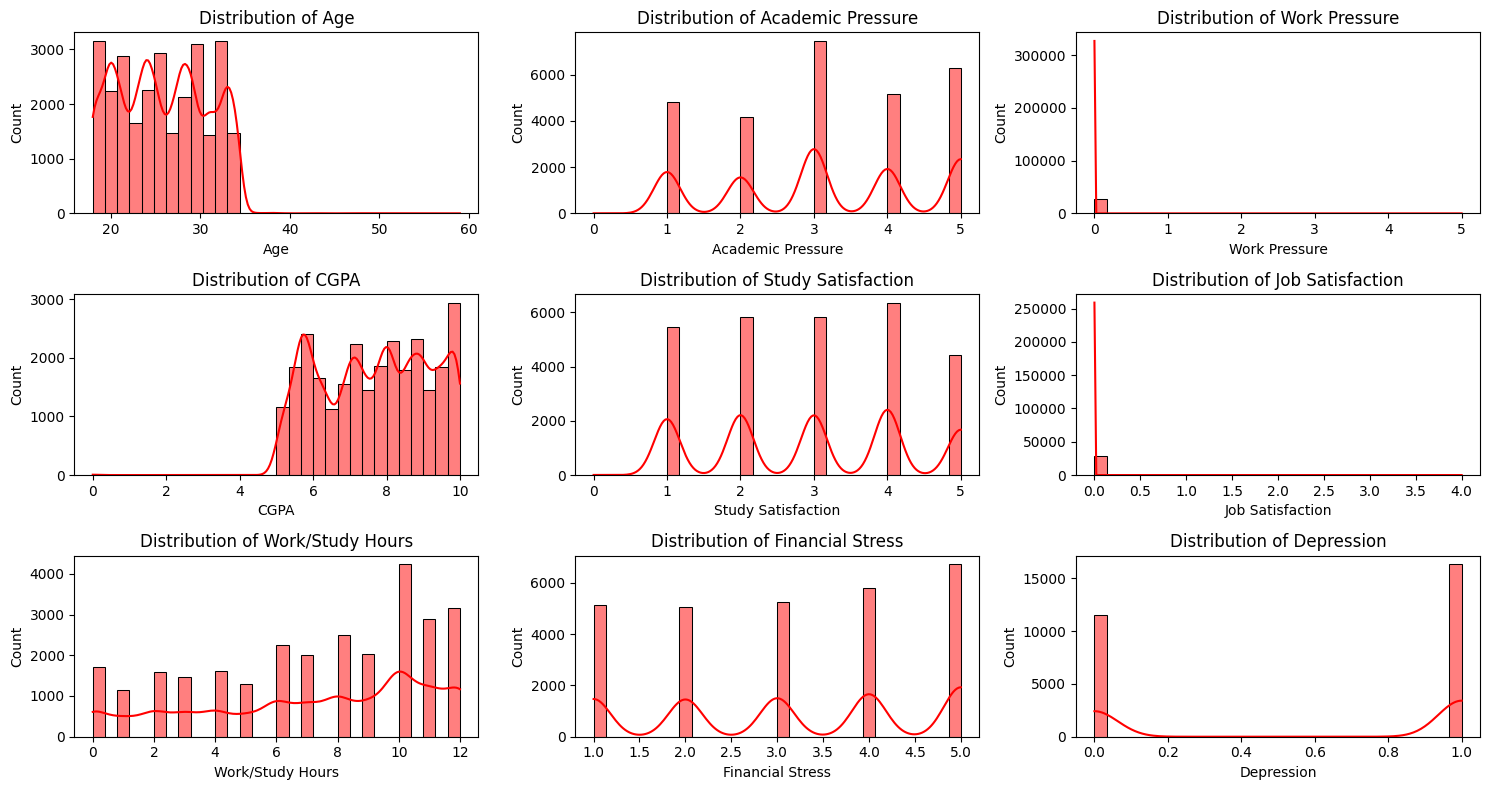

In [16]:
# Selecting numerical columns (excluding target variable)
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Histplot Distribution of Columns Before Processing
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], bins=30, kde=True, color='Red')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**📌 Insights**


**Distribution Plots**

The image shows the distribution of various features in the dataset, revealing patterns, skewness, and possible data issues.

**1. Age**
* Appears to be nearly normally distributed with a slight right skew.
* Some outliers present beyond 50 years.

**2. Academic Pressure & Study Satisfaction**
* Data is categorical or ordinal, with values clustered at discrete points (1 to 5).
* These distributions are not continuous, so transformations may not be necessary.

**3. Work Pressure & Job Satisfaction**
* Both highly skewed to the right.
* Most values are concentrated at 0, suggesting data imbalance or incorrect scaling.
* Possible issue with data collection—many entries at 0? Need further investigation.

**4. CGPA**
* Slight right skew, but generally well-distributed.
* Some low CGPA values (~0-2) may be outliers.

**5. Work/Study Hours**
* Appears fairly uniform, with multiple peaks.
* Need to check for outliers above 12 hours.

**6. Financial Stress**
* Categorical (1 to 5)
* Distribution is fairly balanced across the range.

**7. Depression (Target Variable)**
Binary (0 or 1)
* Class imbalance detected → More 0s (No Depression) than 1s (Depression).
* Might require balancing techniques (like SMOTE) if using machine learning.

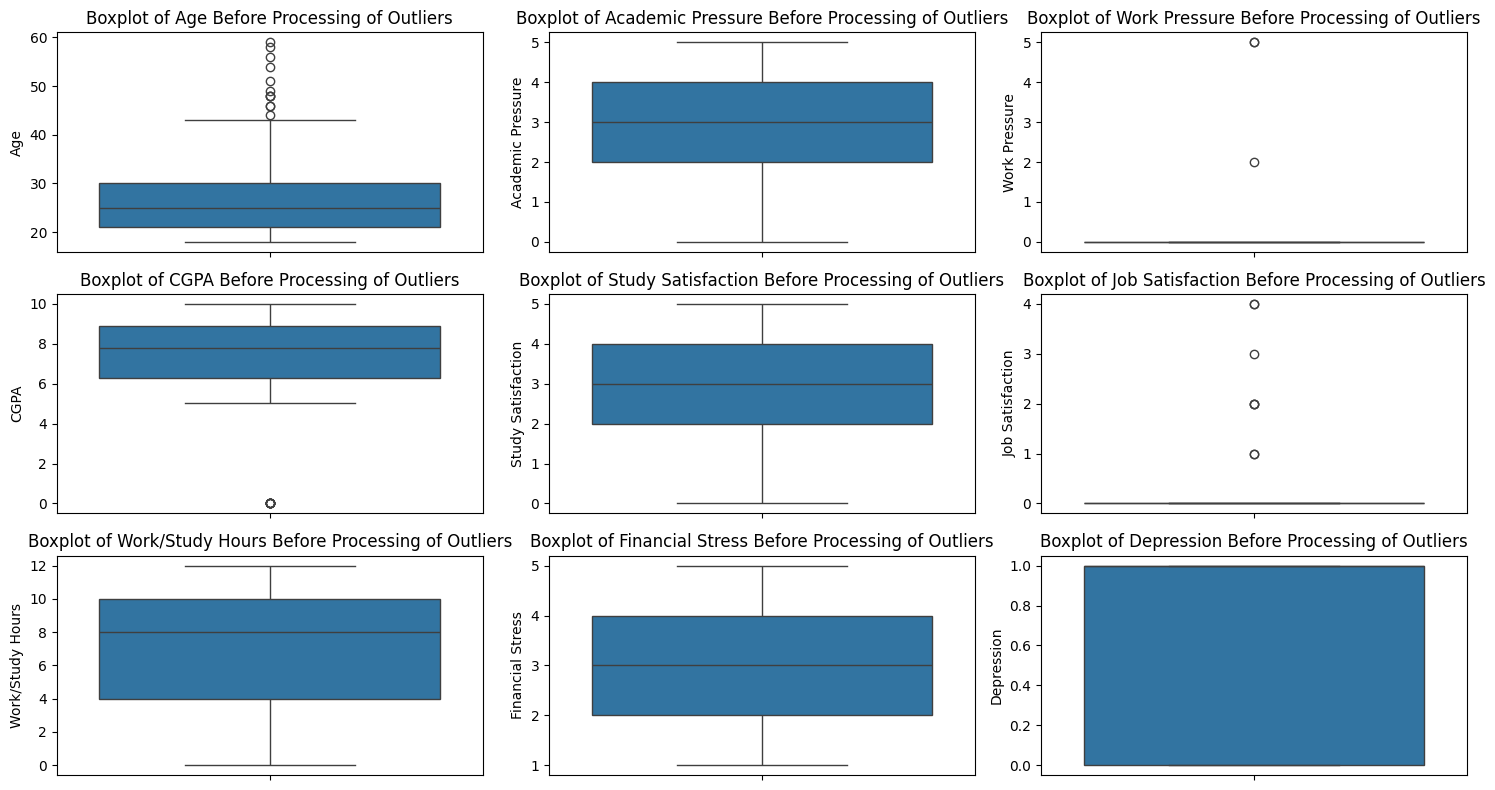

In [17]:
# Boxplot: Checking Outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col} Before Processing of Outliers')
plt.tight_layout()
plt.show()

**📌 Insights**

**Boxplots (Before Outlier Processing)**

**1. Age:**

* There are several outliers on the higher end (ages above ~40).
* Most values are concentrated between 18-30 years.

**2. Academic Pressure:**

* No significant outliers.
* Data appears well-distributed.

**3. Work Pressure:**

* Contains a few extreme outliers (values much higher than the rest).
* Most observations are very low.

**4. CGPA:**

* A single extreme low outlier (close to 0).
* Otherwise, values are normally distributed between 6-9.

**5. Study Satisfaction:**

* No noticeable outliers.
* Appears to be well spread.

**6. Job Satisfaction:**

* Contains multiple high-end outliers.
* Most values are clustered near 0.

**7. Work/Study Hours:**

* No major outliers.
* Normally distributed between 4-10 hours.

**8. Financial Stress:**

* No significant outliers.
* Data appears to be evenly spread.

**9. Depression:**

* Appears binary or categorical (0 or 1).
* No outliers present.

In [18]:
# Identify highly skewed features
skewed_features = skew_values[skew_values > 1].index

# Apply log transformation to highly skewed features
data[skewed_features] = data[skewed_features].apply(lambda x: np.log1p(x))  # log1p prevents log(0) errors

# Print the affected column names properly
print("Log transformation applied to highly skewed features:", list(skewed_features))

Log transformation applied to highly skewed features: ['Work Pressure', 'Job Satisfaction']


**📌 Insights**

* Both `Work Pressure` and `Job Satisfaction` were highly skewed
* therefore, a log transformation was applied to these features to reduce skewness and bring the data closer to a normal distribution.

In [19]:
def cap_outliers(data, columns):
    data_cleaned = data.copy()

    for col in columns:
        Q1, Q3 = data_cleaned[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply capping
        data_cleaned[col] = data_cleaned[col].clip(lower_bound, upper_bound)

    return data_cleaned

# Identify non-skewed numerical features
normal_features = data.select_dtypes(include=['float64', 'int64']).columns.drop(['Depression','Job Satisfaction','Work Pressure'])

# Apply IQR-based outlier capping
data_cleaned = cap_outliers(data, normal_features)

print("Outliers capped for non-skewed features:", list(normal_features))

Outliers capped for non-skewed features: ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']


**📌 Insights**

 **IQR-Based Outlier Capping**

* The Interquartile Range (IQR) method was used to cap outliers for non-skewed numerical features.
* Lower and upper bounds were calculated for each column:

* Any values beyond these bounds were clipped to reduce the impact of extreme outliers.

**Why Was Depression Excluded?**
* Depression is likely a target variable.

* Modifying the target variable could distort relationships in the dataset.

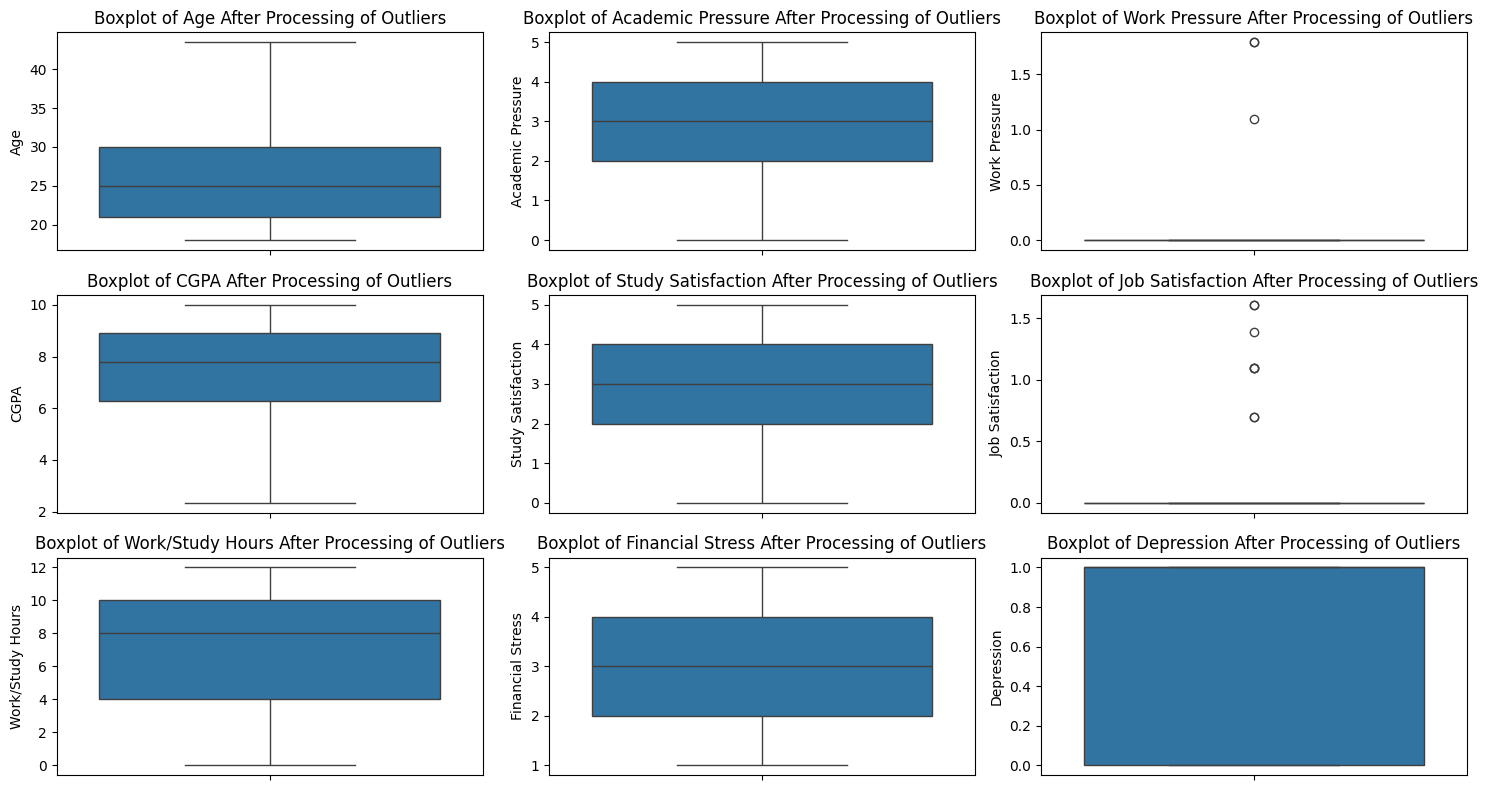

In [20]:
# Boxplot: Checking Outliers After Processing
plt.figure(figsize=(15, 8))
for i, col in enumerate(data_cleaned.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data_cleaned[col])
    plt.title(f'Boxplot of {col} After Processing of Outliers')
plt.tight_layout()
plt.show()

**📌 Insights**

**Boxplots After Outlier Capping**
* Age, CGPA, Study Satisfaction, and Academic Pressure are well-distributed with no extreme outliers.
* Work/Study Hours mostly range between 2 to 12 hours, with a median around 6-8 hours.
* Depression variable appears binary (0 or 1), with most values as 1, indicating a high occurrence.
* Work Pressure & Job Satisfaction: After applying log transformation, outlier capping caused some values to become NaN, likely due to handling zero values.

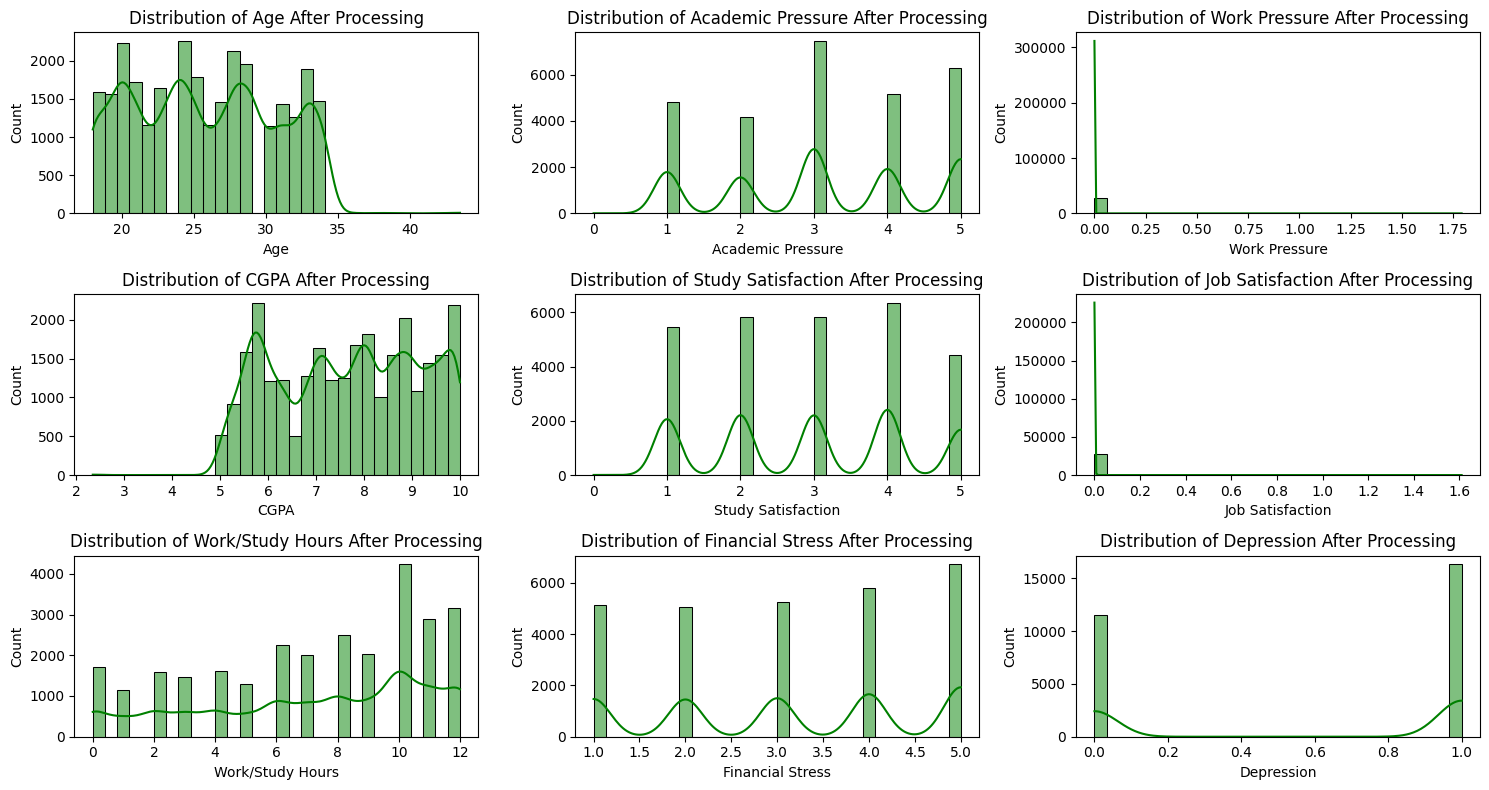

In [21]:
# Histplot Distribution of Columns After Processing
plt.figure(figsize=(15, 8))
for i, col in enumerate(data_cleaned.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_cleaned[col], bins=30, kde=True, color='Green')
    plt.title(f'Distribution of {col} After Processing')
plt.tight_layout()
plt.show()

**📌 Insights**

**Histogram After Outlier Capping**

* Work Pressure & Job Satisfaction: Log transformation caused severe skewness; outlier capping led to NaN values.
* Age & CGPA: Distribution remains structured after capping.
* Academic Pressure & Study Satisfaction: Retained categorical nature.
* Depression: Mostly binary (0 or 1).
* Work/Study Hours & Financial Stress: Properly capped without excessive trimming.

In [22]:
max_value = data_cleaned['Depression'].value_counts().max()
min_value = data_cleaned['Depression'].value_counts().min()
ratio = max_value / min_value

print(f'Class Imbalance Ratio: {ratio:.2f}')

Class Imbalance Ratio: 1.41


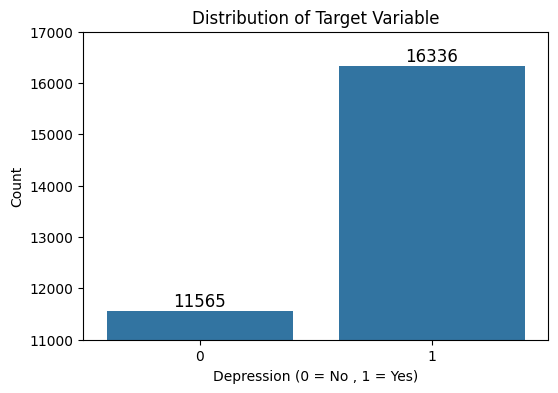

In [23]:
# Target variable distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data_cleaned['Depression'])

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert height to integer
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
                ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Target Variable')
plt.xlabel('Depression (0 = No , 1 = Yes)')
plt.ylabel('Count')
plt.ylim(11000, 17000)  # Adjusting for better visibility of numbers
plt.show()

**📌 Insights**

**Target variable distribution**

* The class ratio is approximately 1.41 (16,336/11,565), indicating a moderate imbalance but not extreme.
*SMOTE may not be necessary initially; instead, we can train the model without resampling and evaluate performance first.
* If imbalance affects model performance, we can apply resampling techniques later.

# **Exploratory Data Analysis(EDA)**

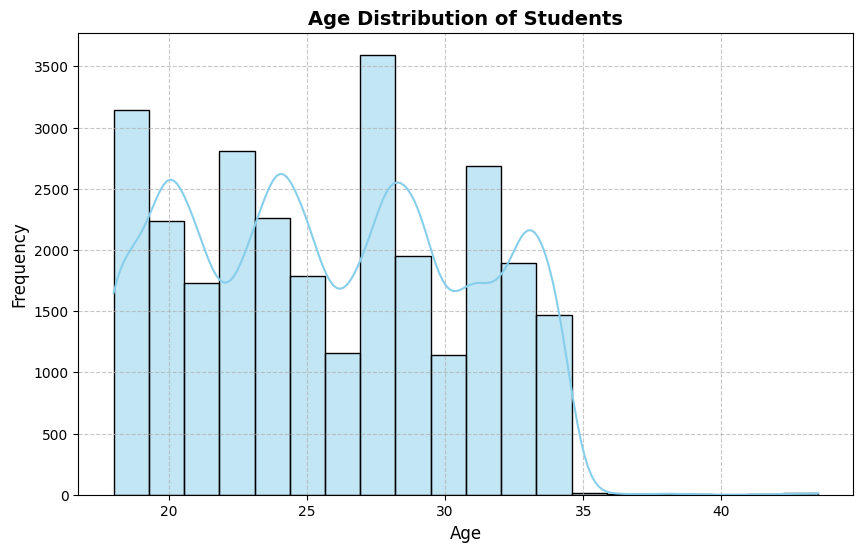

In [24]:
# Histogram for Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Students', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**📌 Insights**

* The age distribution of students appears multi-modal, with multiple peaks indicating distinct groups.
* Most students fall between 18 and 35 years old, with several high-frequency age ranges.
* A slight right skew suggests fewer students in older age groups beyond 35.
* The KDE curve highlights underlying trends in student age distribution.

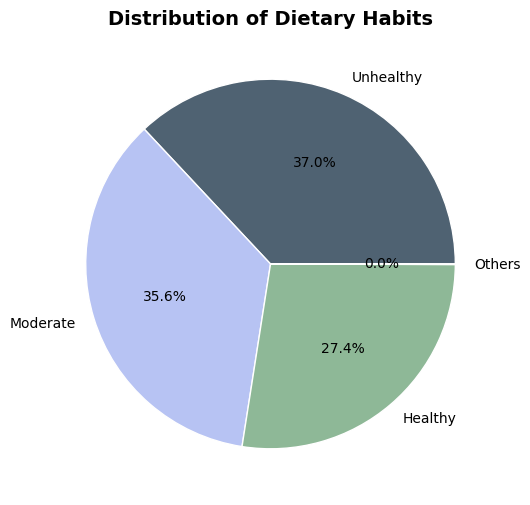

In [25]:
# Piechart:Distribution of Dietary Habits
plt.figure(figsize=(10,6))
data_cleaned['Dietary Habits'].value_counts().plot.pie(autopct='%1.1f%%',
                                                     colors=['#4F6272', '#B7C3F3','#8EB897'],
                                                    wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Distribution of Dietary Habits', fontsize=14, fontweight='bold')
plt.ylabel("")  # Remove y-label for better clarity
plt.show()

**📌 Insights**
* Unhealthy (37.0%) is the most common dietary habit, followed by Moderate (35.6%) and Healthy (27.4%).
* The "Others" category is at 0%, indicating no significant data for that group.
* A large proportion follows unhealthy or moderate diets, suggesting a need for improved nutrition awareness.

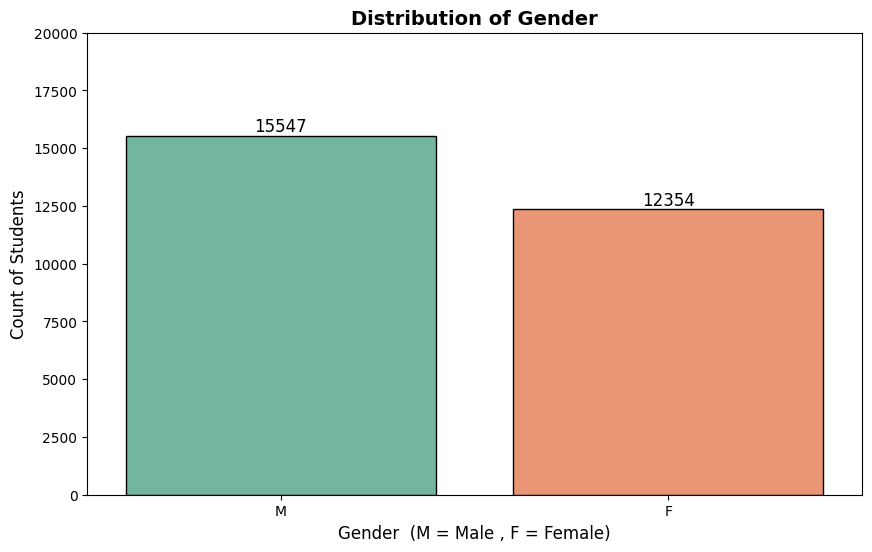

In [26]:
# Countplot: Distribution of Gender
plt.figure(figsize=(10,6))
ax=sns.countplot(x=data_cleaned['Gender'], hue=data_cleaned['Gender'], palette='Set2', edgecolor='black', legend=False)
# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert height to integer
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
                ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender  (M = Male , F = Female)', fontsize=12)
plt.ylabel('Count of Students', fontsize=12)
plt.ylim(0, 20000)
plt.show()

**📌 Insights**
* The dataset has more male students (15,547) than female students (12,354).
* The gender distribution is not heavily imbalanced, but there is a noticeable difference.
* Any gender-based analysis should consider this slight skew in representation.

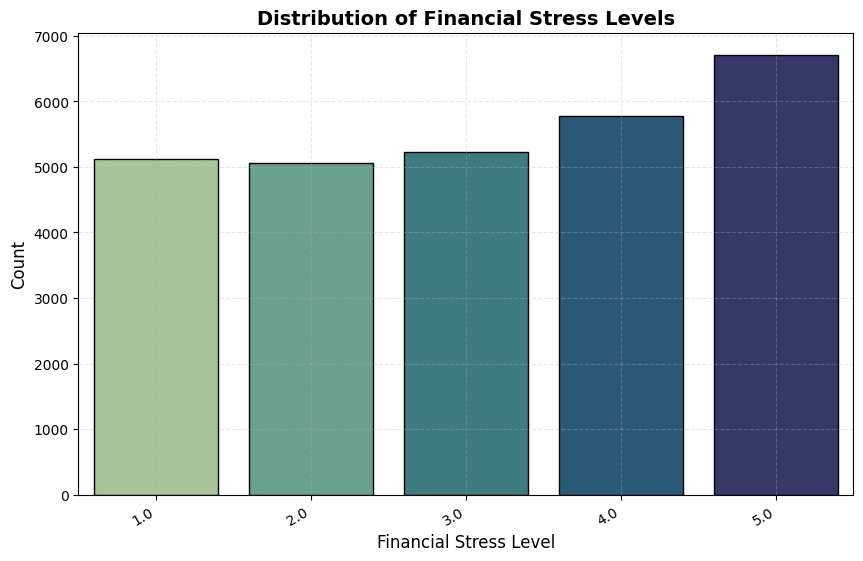

In [27]:
# Countplot:Distribution of Financial Stress Levels
plt.figure(figsize=(10, 6))
sns.countplot(x=data_cleaned['Financial Stress'], hue=data_cleaned['Financial Stress'], palette='crest', edgecolor='black',legend=False)
plt.title('Distribution of Financial Stress Levels', fontsize=14, fontweight='bold')
plt.xlabel('Financial Stress Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30, ha='right')  # Improve readability of x-axis if categorical values are long
plt.grid(True, linestyle='--', alpha=0.3) # Add grid for better readability
plt.show()

**📌 Insights**
* Higher financial stress levels (4 and 5) have more counts, indicating that financial stress is a common issue.
* The number of individuals experiencing low stress (levels 1 and 2) is relatively lower compared to higher levels.
* There is a gradual increase in financial stress levels, suggesting that financial pressure may be a widespread concern among the population

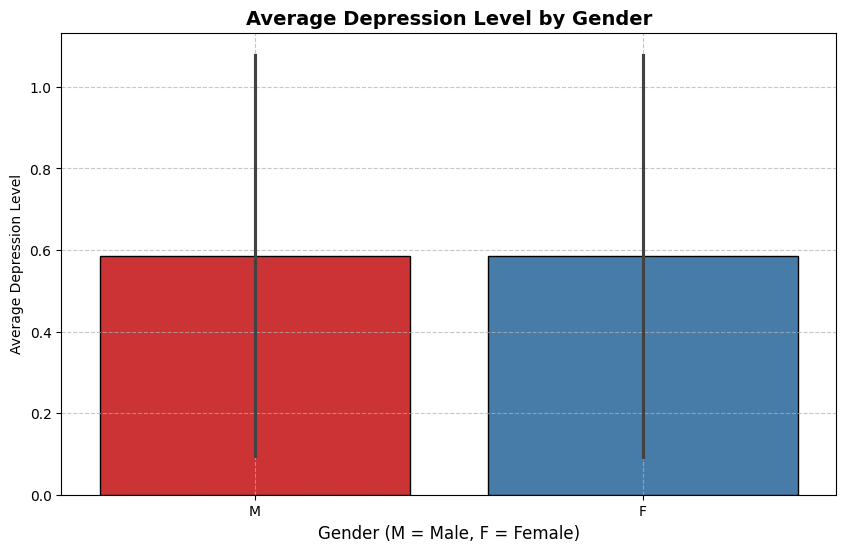

In [28]:
# Barplot:Average Depression Level by Gender
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='Depression',data=data_cleaned, hue='Gender', errorbar="sd", palette="Set1", edgecolor="black", legend=False)
plt.title('Average Depression Level by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender (M = Male, F = Female)', fontsize=12)
plt.ylabel('Average Depression Level')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**📌 Insights**
* The average depression levels are similar for both males and females, suggesting no significant gender-based difference in depression levels.
* The presence of long vertical lines (error bars) indicates a wide variation in individual depression levels within each gender.
* This suggests that while the averages are similar, some individuals experience much higher or lower depression levels than the average.

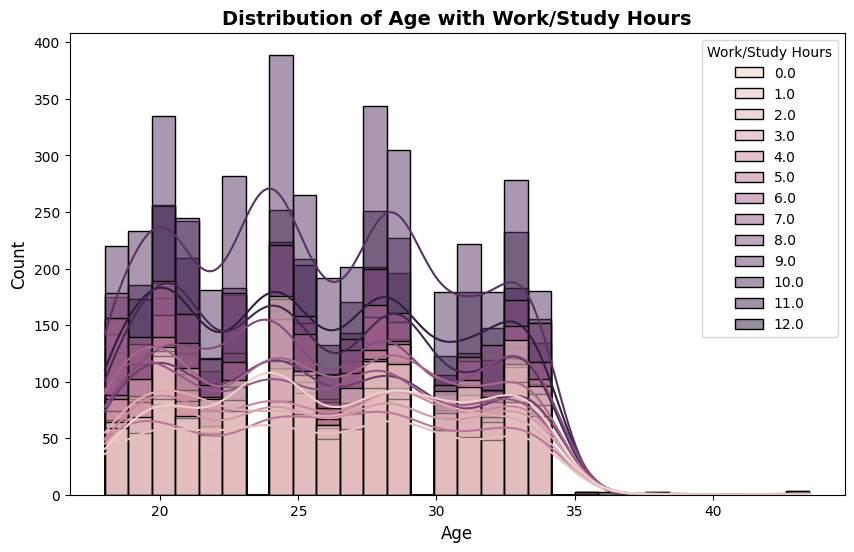

In [29]:
# Histplot:Distribution of Age with Work/Study Hours
plt.figure(figsize=(10, 6))
sns.histplot(data=data_cleaned, x='Age', hue='Work/Study Hours', kde=True, bins=30)
plt.title('Distribution of Age with Work/Study Hours', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**📌 Insights**

* The age distribution shows multiple peaks, suggesting that certain age groups (around 20-30 years old) have a higher frequency.
* Different work/study hours are distributed across various ages, with darker shades indicating higher study/work hours.
* The density curves suggest that study/work hours are spread across all ages, with some variation in intensity, indicating that some age groups study/work more than others.
* There is a gradual decline after the early 30s, suggesting fewer individuals in that range with significant study/work hours.

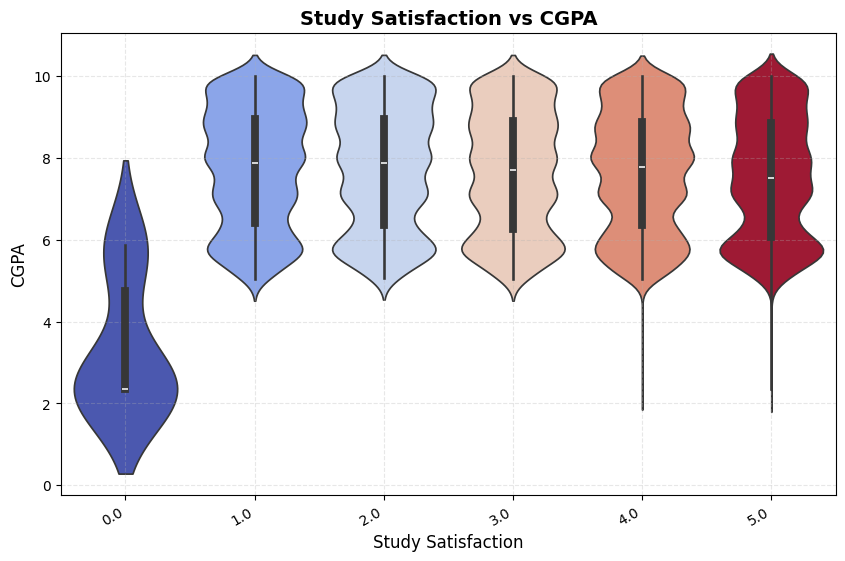

In [30]:
# Violin Plot: Study Satisfaction vs CGPA
plt.figure(figsize=(10,6))
sns.violinplot(x='Study Satisfaction', y='CGPA', data=data_cleaned, hue='Study Satisfaction', palette='coolwarm',legend=False)
plt.title('Study Satisfaction vs CGPA', fontsize=14, fontweight='bold')
plt.xlabel('Study Satisfaction', fontsize=12)
plt.ylabel('CGPA', fontsize=12)
plt.xticks(rotation=30, ha='right')  # Improve readability if x-axis labels are long
plt.grid(True, linestyle='--', alpha=0.3)  # Add grid for better readability
plt.show()

**📌 Insights**
* Higher study satisfaction is associated with a higher CGPA, as seen in the shift towards higher CGPA values in categories 1-5.
* Low study satisfaction (0.0) has a wider spread and lower median CGPA, indicating inconsistent academic performance.
* As study satisfaction increases, the CGPA distribution narrows around higher values, suggesting more stable and improved performance.
* The overall trend suggests a positive correlation between study satisfaction and academic success.

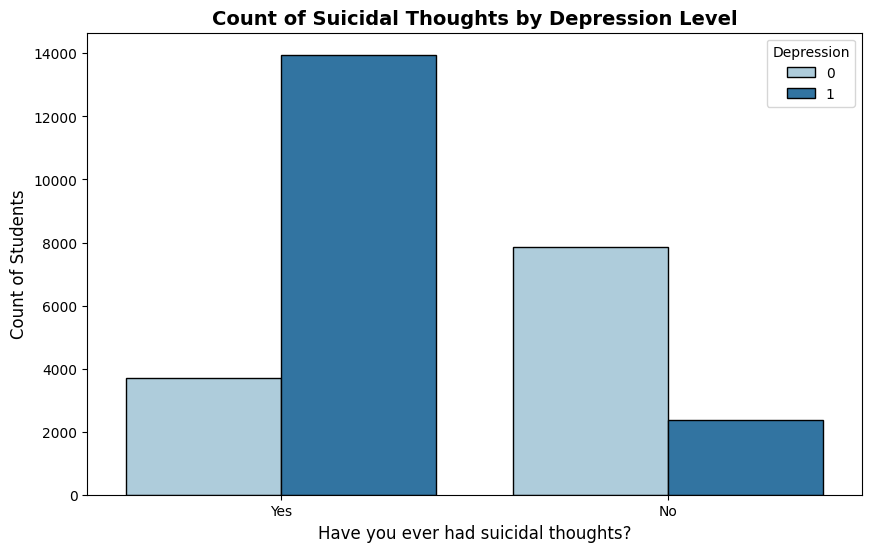

In [31]:
# Countplot : Count of Suicidal Thoughts by Depression Level
plt.figure(figsize=(10,6))
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=data_cleaned, palette='Paired', edgecolor='black')
plt.title('Count of Suicidal Thoughts by Depression Level', fontsize=14, fontweight='bold')
plt.xlabel('Have you ever had suicidal thoughts?', fontsize=12)
plt.ylabel('Count of Students', fontsize=12)
plt.show()

**📌 Insights from the Bar Chart:**

**1. Strong Association Between Depression and Suicidal Thoughts**

* A significantly higher number of students with depression (1) reported having suicidal thoughts compared to those without depression.

* In contrast, among students who never had suicidal thoughts, the majority did not have depression (0).

**2. High Risk Factor**

* The number of students with depression who reported suicidal thoughts is overwhelmingly higher, suggesting a strong link between mental health conditions and suicidal ideation.

**3. Need for Mental Health Support**

* The data highlights the necessity for mental health interventions, particularly for students exhibiting signs of depression.

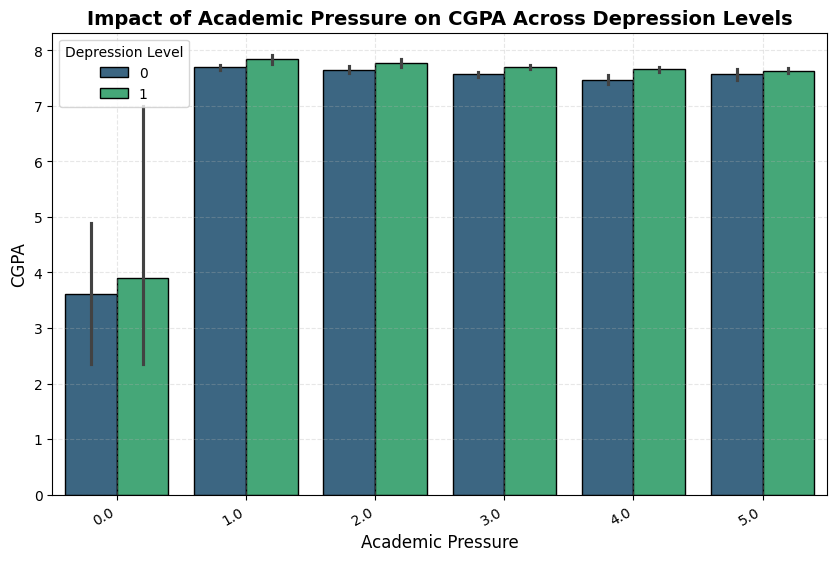

In [32]:
# Barplot : Impact of Academic Pressure on CGPA Across Depression Levels
plt.figure(figsize=(10, 6))
sns.barplot(x='Academic Pressure', y='CGPA', data=data_cleaned, hue='Depression', palette='viridis', edgecolor='black')
plt.title('Impact of Academic Pressure on CGPA Across Depression Levels', fontsize=14, fontweight='bold')
plt.xlabel('Academic Pressure', fontsize=12)
plt.ylabel('CGPA', fontsize=12)
plt.xticks(rotation=30, ha='right')  # Improve readability if x-axis labels are long
plt.grid(True, linestyle='--', alpha=0.3)  # Add grid for better readability
plt.legend(title='Depression Level')# Add legend correctly
plt.show()

**📌 Insights**

* Low academic pressure (0.0) shows high CGPA variability, especially for students with depression (Level 1), indicating inconsistent performance.
* As academic pressure increases, CGPA stabilizes and remains relatively high across both depression levels.
* No significant CGPA difference is observed between students with and without depression at moderate to high pressure levels.
* Higher academic pressure does not seem to negatively impact CGPA, suggesting students adapt or perform consistently under pressure.

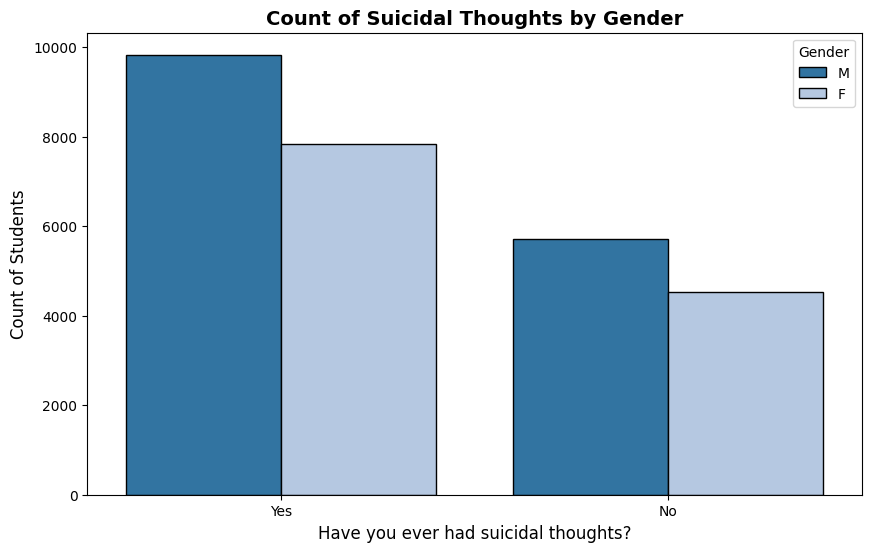

In [33]:
# Countplot : Count of Suicidal Thoughts by Gender
plt.figure(figsize=(10,6))
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Gender', data=data_cleaned, palette='tab20', edgecolor='black')
plt.title('Count of Suicidal Thoughts by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Have you ever had suicidal thoughts?', fontsize=12)
plt.ylabel('Count of Students', fontsize=12)
plt.show()

**📌 Insights from the Bar Chart:**

**1. Higher Suicidal Thoughts in Males**

* More male (M) students reported experiencing suicidal thoughts compared to female (F) students.

**2. Gender Difference in Suicidal Thoughts**

* While both genders show significant numbers, males appear to have a higher count of suicidal ideation.

* However, the difference is not extremely large, indicating that suicidal thoughts are a serious concern for both genders.

**3. Need for Gender-Specific Mental Health Suppor**t

* Given the prevalence of suicidal thoughts among both males and females, tailored mental health strategies should be considered to address their specific challenges.

In [34]:
corr_matrix = data_cleaned.select_dtypes(include=['float64','int64']).corr()
corr_matrix

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Age,1.000000,-0.075864,0.001117,0.004935,0.009411,-0.002372,-0.032746,-0.095620,-0.226443
Academic Pressure,-0.075864,1.000000,-0.023079,-0.023088,-0.110988,-0.026146,0.095970,0.151706,0.474835
Work Pressure,0.001117,-0.023079,1.000000,-0.036743,-0.021952,0.691549,-0.006142,0.001715,-0.004179
CGPA,0.004935,-0.023088,-0.036743,1.000000,-0.044898,-0.037531,0.002666,0.006091,0.022113
Study Satisfaction,0.009411,-0.110988,-0.021952,-0.044898,1.000000,-0.022764,-0.036441,-0.065092,-0.167971
Job Satisfaction,-0.002372,-0.026146,0.691549,-0.037531,-0.022764,1.000000,-0.005565,0.005447,-0.003335
Work/Study Hours,-0.032746,0.095970,-0.006142,0.002666,-0.036441,-0.005565,1.000000,0.075267,0.208563
Financial Stress,-0.095620,0.151706,0.001715,0.006091,-0.065092,0.005447,0.075267,1.000000,0.363574
Depression,-0.226443,0.474835,-0.004179,0.022113,-0.167971,-0.003335,0.208563,0.363574,1.000000


**📌 Insights**

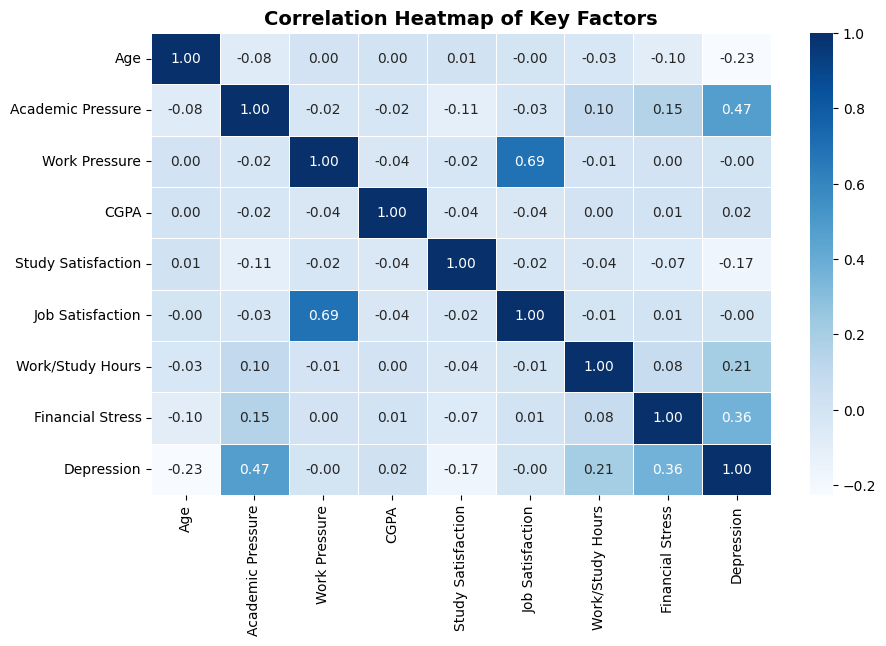

In [35]:
# Heatmap for correlation between key numerical factors
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap=sns.color_palette('Blues', as_cmap=True), annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Key Factors', fontsize=14, fontweight='bold')
plt.show()

**📌 Insights**

* Academic Pressure has a moderate positive correlation (0.47) with Depression, suggesting that higher academic pressure is associated with increased depression levels.
* Financial Stress also has a moderate positive correlation (0.36) with Depression, indicating that financial concerns may contribute to mental health struggles.
* Job Satisfaction and Work Pressure (0.69) show a strong correlation, implying that higher work pressure significantly affects job satisfaction.
* CGPA shows no strong correlation with other factors, indicating that academic performance remains relatively stable despite external pressures.
* Study Satisfaction has a weak negative correlation (-0.17) with Depression, suggesting that lower study satisfaction may slightly contribute to higher depression levels.

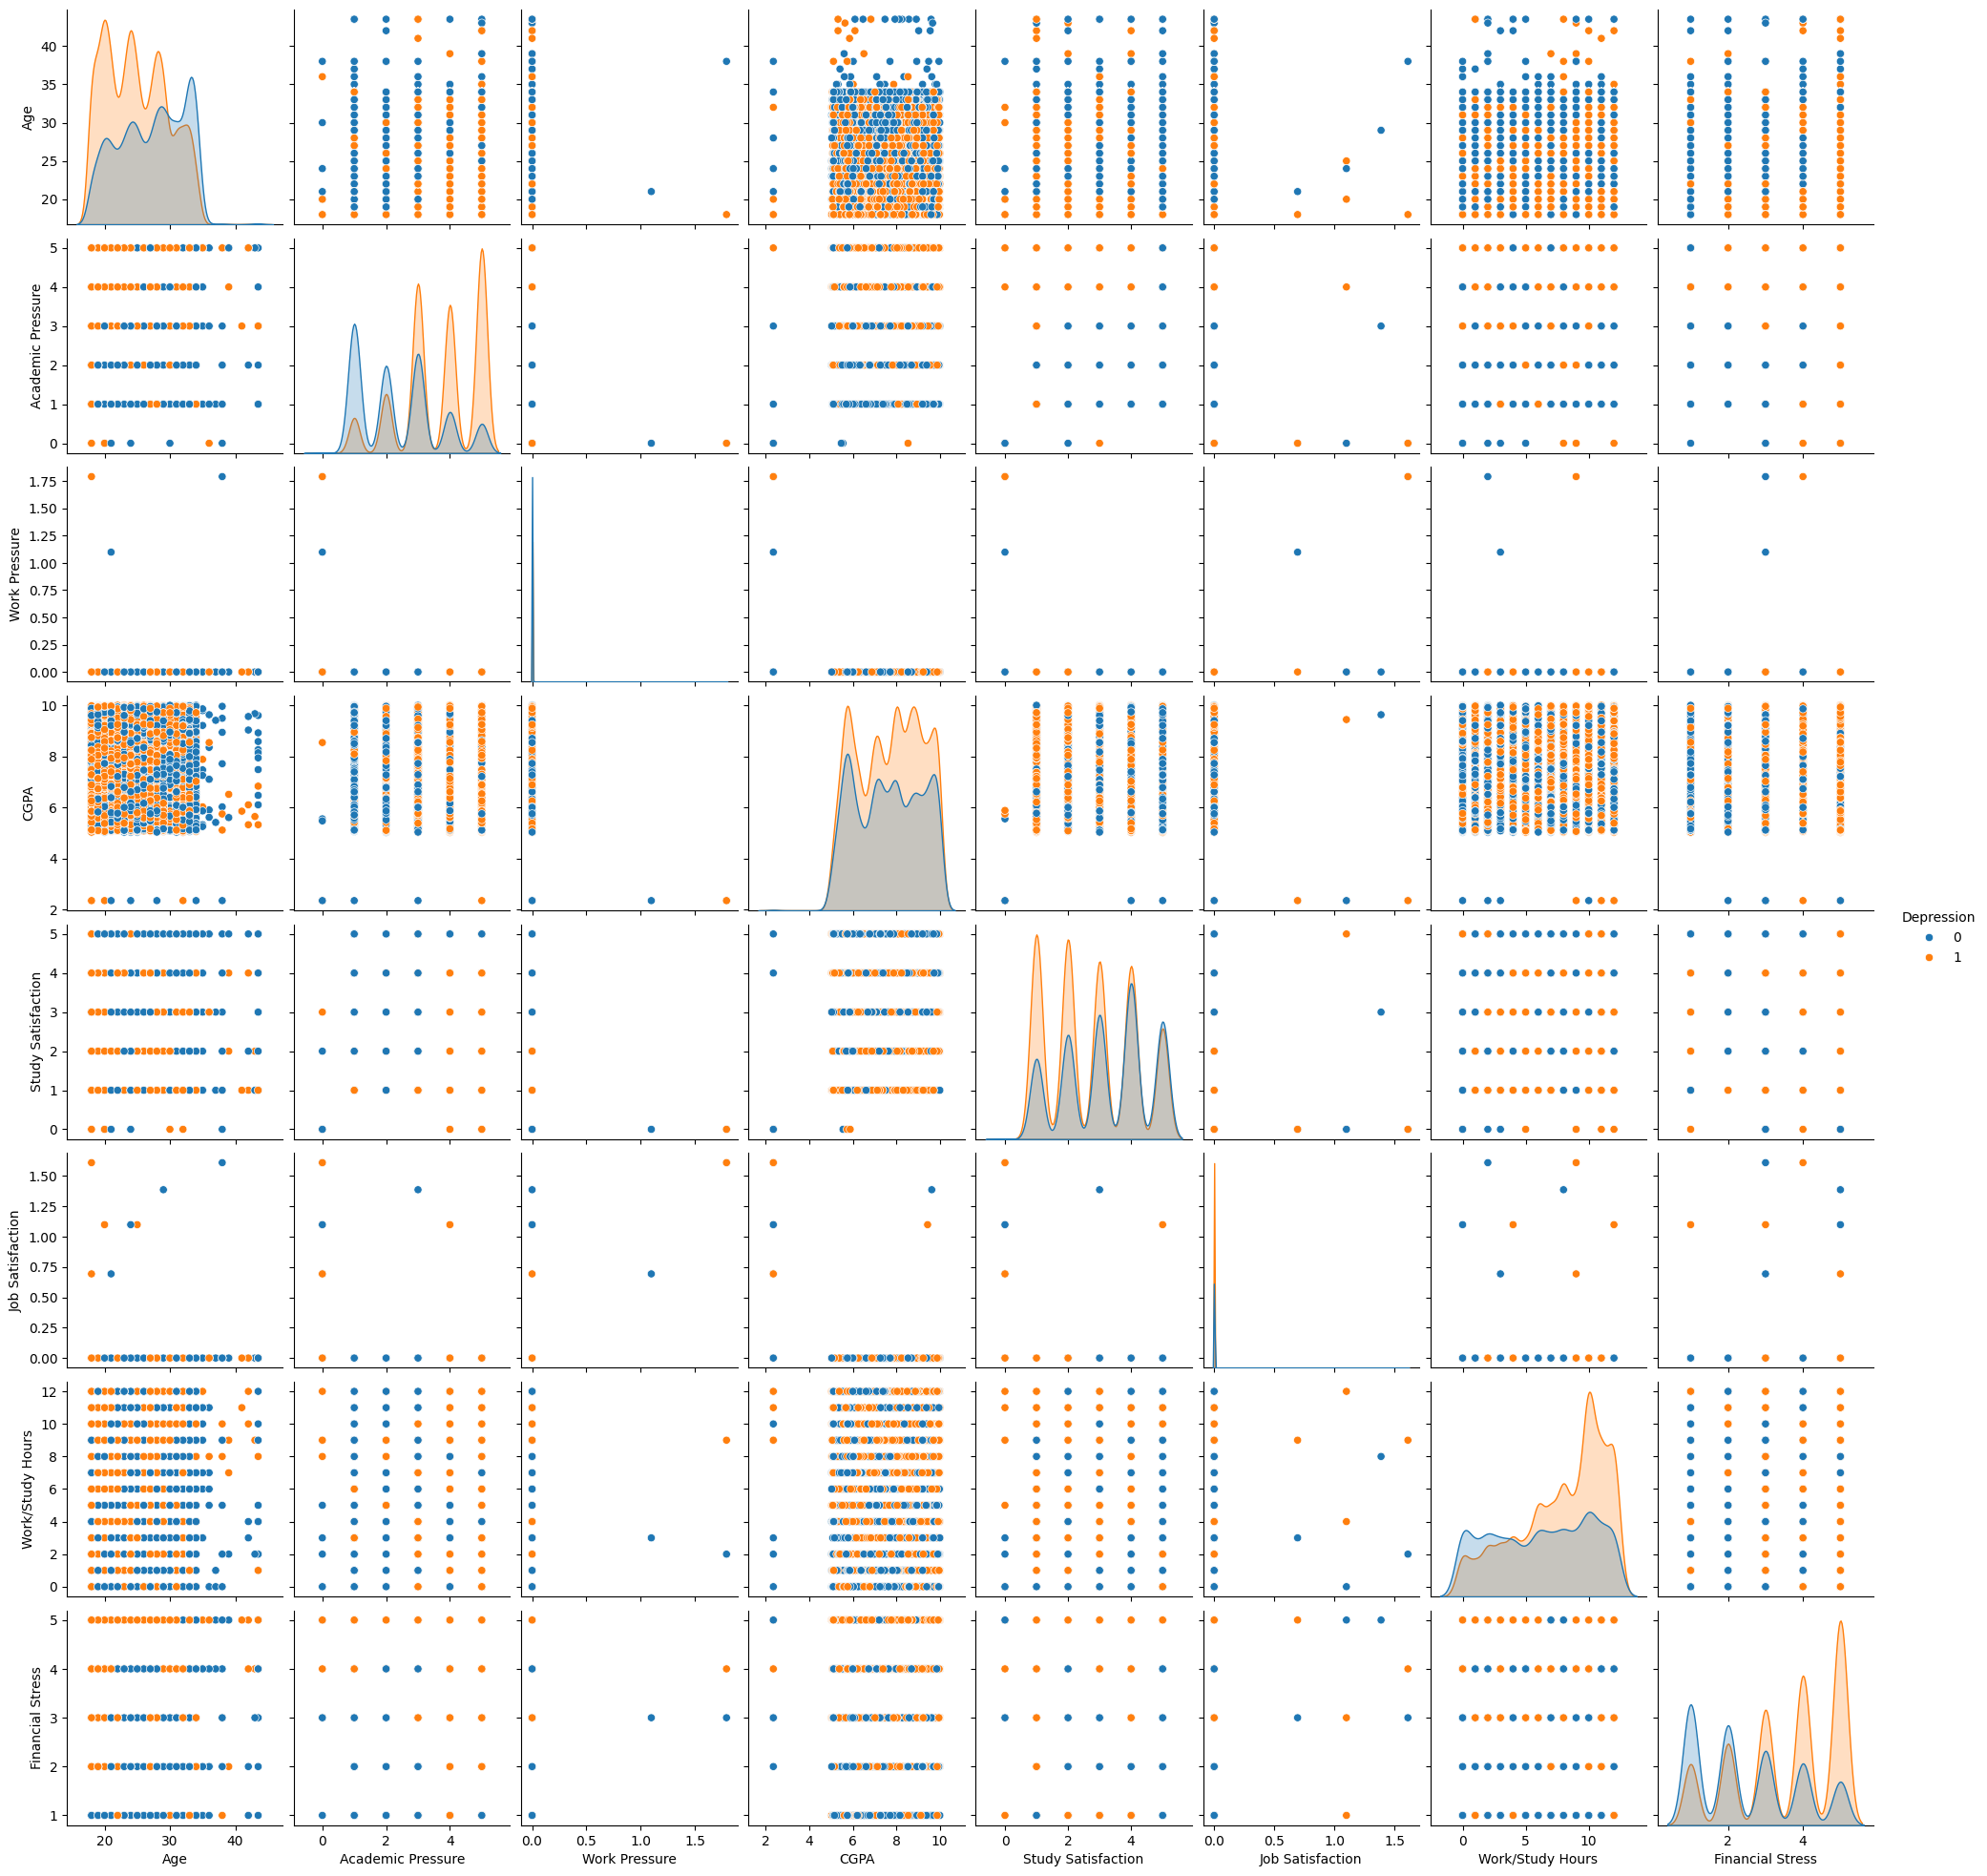

In [36]:
# Selecting only numerical columns
pp_col = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Create pairplot with KDE on diagonal, specifying 'Depression' as the hue column within pp_col
sns.pairplot(pp_col, hue='Depression', diag_kind='kde')

# Show the plot
plt.show()

**📌 Insights**

**Pair Plot:**

**1. Distribution Patterns**

* Some variables, like CGPA and Work/Study Hours, show distinct multi-modal distributions, indicating grouped data points.
* Depression and Financial Stress appear to have binary distributions, suggesting categorical responses (e.g., Yes/No).
Relationships Between Variables

**2. Work Pressure vs. Job Satisfaction**
* Shows a structured pattern, indicating a strong relationship, consistent with the correlation matrix (0.69).
* Academic Pressure vs. Depression: A possible positive relationship, as seen in the correlation matrix (0.47).

**3. Scattered or Weak Relations**
* Some variables, like CGPA vs. other factors, do not show strong trends, meaning CGPA is less influenced by external stressors.

**4. Clustered Data Points**

* Many plots have stacked points, indicating categorical data with limited unique values rather than continuous distributions.

# **Feature Engineering**

In [37]:
# Count unique values for each categorical column
cat_cols = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[cat_cols].nunique()

,0
Gender,2
Profession,14
Sleep Duration,5
Dietary Habits,4
Have you ever had suicidal thoughts ?,2
Family History of Mental Illness,2


**📌 Insights**

**Binary Categorical Columns :**
* **Gender, Have you ever had suicidal thoughts?, Family History of Mental Illness** → These have 2 unique values and could be encoded as 0 & 1.

**Multi-Class Categorical Columns :**

* **Profession (14 values), Sleep Duration (5 values), Dietary Habits (4 values)** → These may require one-hot encoding or label encoding.

In [38]:
# Identify categorical columns (excluding 'Profession')
cat_cols = data_cleaned.select_dtypes(include=['object']).drop(columns=['Profession'], errors='ignore').columns
# One-Hot Encoding (OHE) for remaining categorical columns
data_cleaned = pd.get_dummies(data=data_cleaned, columns=cat_cols, dtype=int, drop_first=True)

# Frequency Encoding for 'Profession'
data_cleaned['Profession'] = data_cleaned['Profession'].map(data_cleaned['Profession'].value_counts(normalize=True))

data_cleaned.head()

,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_M,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,33.0,0.998889,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1,1,0,0,0,0,0,0,0,1,0
1,24.0,0.998889,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0,0,0,0,0,0,1,0,0,0,1
2,31.0,0.998889,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0,1,0,1,0,0,0,0,0,0,1
3,28.0,0.998889,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1,0,1,0,0,0,1,0,0,1,1
4,25.0,0.998889,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0,0,0,0,0,0,1,0,0,1,0


**📌 Insights**

* One-Hot Encoding (OHE) converts categorical columns (except 'Profession') into binary features.
* Frequency Encoding replaces 'Profession' with its occurrence probability to reduce dimensionality.
* Display the first few rows of the transformed dataset

In [39]:
# Understand the dataset structure.
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        27901 non-null  float64
 1   Profession                                 27901 non-null  float64
 2   Academic Pressure                          27901 non-null  float64
 3   Work Pressure                              27901 non-null  float64
 4   CGPA                                       27901 non-null  float64
 5   Study Satisfaction                         27901 non-null  float64
 6   Job Satisfaction                           27901 non-null  float64
 7   Work/Study Hours                           27901 non-null  float64
 8   Financial Stress                           27901 non-null  float64
 9   Depression                                 27901 non-null  int64  
 10  Gender_M              

In [40]:
# Display the number of rows and columns
data_cleaned.shape

(27901, 20)

In [41]:
# Identify binary columns (features with only 2 unique values)
binary_cols = [i for i in data_cleaned.columns if data_cleaned[i].nunique() == 2]
# Extract only the binary columns into a new DataFrame
binary_data = data_cleaned[binary_cols]

# Print the list of binary columns
print("Binary Columns:", binary_cols)
# Display the extracted binary data
print(binary_data)

Binary Columns: ['Depression', 'Gender_M', 'Sleep Duration_7-8 hours', 'Sleep Duration_Less than 5 hours', 'Sleep Duration_More than 8 hours', 'Sleep Duration_Others', 'Dietary Habits_Moderate', 'Dietary Habits_Others', 'Dietary Habits_Unhealthy', 'Have you ever had suicidal thoughts ?_Yes', 'Family History of Mental Illness_Yes']
       Depression  Gender_M  Sleep Duration_7-8 hours  \
0               1         1                         0   
1               0         0                         0   
2               0         1                         0   
3               1         0                         1   
4               0         0                         0   
...           ...       ...                       ...   
27896           0         0                         0   
27897           0         1                         0   
27898           0         1                         0   
27899           1         0                         0   
27900           1         1             

**📌 Insights**

* Binary columns are features that have only two unique values, typically representing Yes/No, True/False, or 0/1 categories.

In [42]:
# Identify Non-Binary Numeric Columns
numeric_cols = data_cleaned.select_dtypes(include=['number']).columns
non_binary_cols = [col for col in numeric_cols if col not in binary_cols]
non_binary_cols

['Age',
 'Profession',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress']


**📌 Insights**

**Interpreting Non-Binary Numeric Columns**

These columns contain continuous or multi-class numeric values, meaning they are not just 0s and 1s (binary categories). They may need scaling or transformation for better model performance.

**List of Non-Binary Numeric Columns**

**1. Age** - Continuous variable, may follow a distribution.

**2. Profession** - Categorical but encoded as numbers.

**3. Academic Pressure** - Likely a scale-based rating (e.g., 1-10).

**4. Work Pressure** - Similar to Academic Pressure, could be scaled.

**5. CGPA** - Continuous numeric variable.

**6. Study Satisfaction** - Rating-based variable.

**7. Job Satisfaction** - Rating-based variable.

**8. Work/Study Hours** - Continuous variable.

**9. Financial Stress** - Could be a rating scale.

# **Feature Selection**

In [43]:
# Assume x is your feature set and y is your target variable
x = data_cleaned.drop('Depression', axis=1)  # Features/Independent variable
y = data_cleaned['Depression']  # Target column/ Dependent variable

# Create a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                      Feature  Importance
17  Have you ever had suicidal thoughts ?_Yes    0.214363
2                           Academic Pressure    0.179176
4                                        CGPA    0.123911
0                                         Age    0.111867
8                            Financial Stress    0.102153
7                            Work/Study Hours    0.091451
5                          Study Satisfaction    0.055922
16                   Dietary Habits_Unhealthy    0.024801
9                                    Gender_M    0.020897
18       Family History of Mental Illness_Yes    0.019299
14                    Dietary Habits_Moderate    0.014352
11           Sleep Duration_Less than 5 hours    0.014126
10                   Sleep Duration_7-8 hours    0.013902
12           Sleep Duration_More than 8 hours    0.012890
1                                  Profession    0.000420
15                      Dietary Habits_Others    0.000223
13            

**📌 Insights**


**1. Key Features with High Importance:**

* "**Have you ever had suicidal thoughts? _Yes**" (0.214) is the most significant predictor for depression in your dataset.

* "**Academic Pressure**" (0.179), "CGPA" (0.124), and "**Age**" (0.112) are also strong indicators.

* "**Financial Stress**" (0.102) and "**Work/Study Hours**" (0.091) further highlight the impact of academic and financial burdens.

**2. Moderate Contributors:**

* "**Study Satisfaction**" (0.056) plays a role but is not as crucial as academic and financial pressures.

* "**Dietary Habits** (Unhealthy, Moderate)" and "**Family History of Mental Illness**" indicate some influence, but their impact is lower.

**3. Less Important Features:**

* "**Sleep Duration**" variables have a minor effect, suggesting that while sleep is relevant, it may not be a primary driver of depression in this dataset.

* "**Profession**," "**Dietary Habits** (Others)," "**Sleep Duration** (Others)," "**Job Satisfaction**," and "**Work Pressure**" have almost zero importance, meaning they can likely be removed without affecting the model significantly.

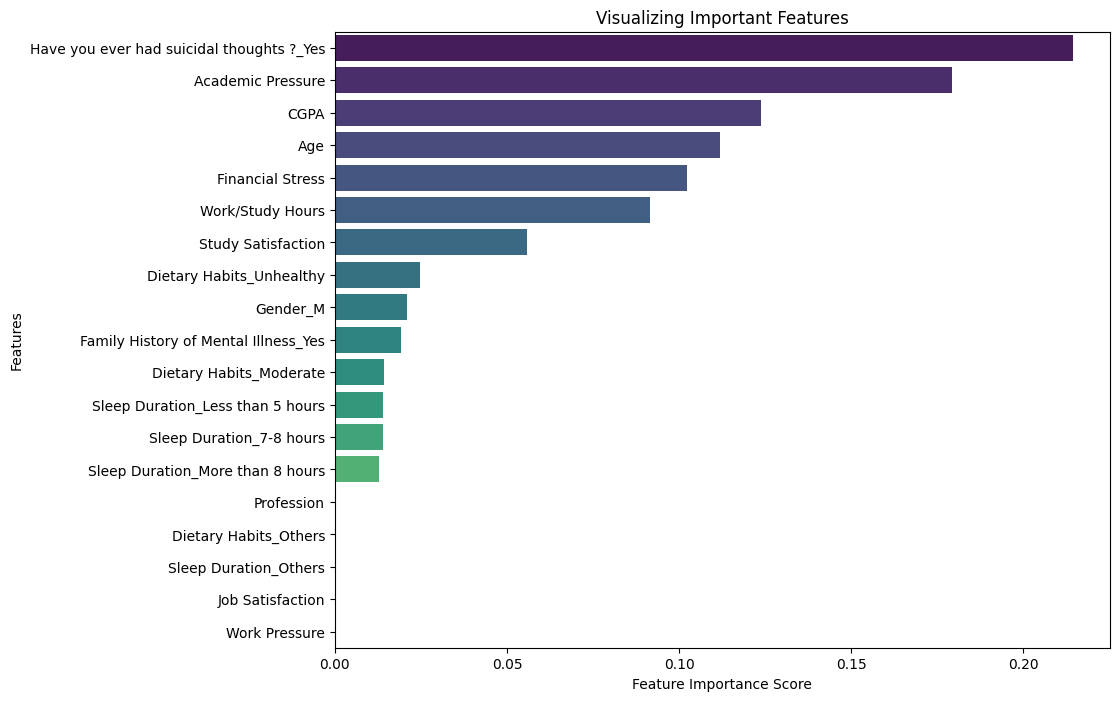

In [44]:
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create the plot with sorted feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance_df, hue='Feature', legend=False, palette='viridis')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

**📌 Insights**

**1. Top Contributing Factors:**

* The most influential feature is **"Have you ever had suicidal thoughts? _Yes"**, indicating a strong correlation with the target variable.

* **Academic Pressure, CGPA, Age, Financial Stress, Work/Study Hours, and Study Satisfaction** also have high importance scores, suggesting that academic and financial stress significantly impact the model's predictions.

**2. Moderate Impact Features:**

* **Dietary habits (Unhealthy, Moderate), Gender (Male), and Family History of Mental Illness** have a moderate effect, indicating their potential influence on the outcome but not as strongly as the top factors.

* **Sleep duration** categories also appear in the list, showing a possible link between sleep patterns and the target variable.

**3. Low Impact Features:**

* **Job Satisfaction and Work Pressure** have very low importance scores, meaning they contribute minimally to the model's predictive power.

**4. Feature Selection Strategy:**

* Features with the highest importance scores (above the set threshold) should be prioritized for training.

* Lower-impact features might be excluded to improve model efficiency without sacrificing accuracy.

This visualization helps in refining the dataset by focusing on the most relevant predictors for better model performance.

In [45]:
# Set a threshold
threshold = 0.03

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]
selected_features_list = selected_features['Feature'].tolist()

print("Selected Features:")
print(selected_features_list)

# Use the selected features
x_selected = x[selected_features_list]

Selected Features:
['Have you ever had suicidal thoughts ?_Yes', 'Academic Pressure', 'CGPA', 'Age', 'Financial Stress', 'Work/Study Hours', 'Study Satisfaction']


**📌 Insights**

1. Feature Selection with Thresholding

* A threshold of 0.03 is set to filter out less important features.

* Only features with an importance score greater than 0.03 are selected.

2. Extracting Important Features

* The feature_importance_df dataframe is used to identify relevant features based on their importance scores.

* The selected features are stored in selected_features_list.

3. Final Selected Features

* The chosen features are:

  * `'Have you ever had suicidal thoughts ?_Yes'`

  * `'Academic Pressure'`

  * `'CGPA'`

  * `'Age'`

  * `'Financial Stress'`

  * `'Work/Study Hours'`

  * `'Study Satisfaction'`

These features are expected to have a strong impact on the model's predictions.

4. Dataset Preparation for Model Training

* The dataset x is filtered to include only the selected features (x_selected).

* This step reduces dimensionality and improves model efficiency by focusing only on highly relevant variables.

In [46]:
# Split the dataset (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print('Training set Features shape:', x_train.shape)
print('Testing set Features shape:', x_test.shape)
print('Training set Target shape:', y_train.shape)
print('Testing set Target shape:', y_test.shape)

# Identify Numeric and Binary Features
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns  # Numeric columns
binary_features = [col for col in x_train.columns if x_train[col].nunique() == 2]  # Binary columns

# Apply StandardScaler Only to Numeric Columns
standard_scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled[numeric_features] = standard_scaler.fit_transform(x_train[numeric_features])
x_test_scaled[numeric_features] = standard_scaler.transform(x_test[numeric_features])

# Display the shape of the train and test sets
print('Training set Features shape x_train_scaled :', x_train_scaled.shape)
print('Testing set Features shape x_test_scaled :', x_test_scaled.shape)

Training set Features shape: (22320, 7)
Testing set Features shape: (5581, 7)
Training set Target shape: (22320,)
Testing set Target shape: (5581,)
Training set Features shape x_train_scaled : (22320, 7)
Testing set Features shape x_test_scaled : (5581, 7)


**📌 Insights**


**1. Data Splitting (80-20 Split)**

* The dataset is divided into 80% training data and 20% testing data using train_test_split.

* Ensures reproducibility with random_state=42.

**2. Dataset Shape Verification**

* The training set contains 22,320 samples with 7 features.

* The testing set contains 5,581 samples with 7 features.

* Target variables (y_train, y_test) match the corresponding dataset sizes.

**3. Feature Identification**

* Numeric features are selected based on data type (int64, float64).

* Binary features are identified as columns with only two unique values.

**4. Feature Scaling with StandardScaler**

* Only numeric columns are standardized using StandardScaler().

* This ensures features have a mean of 0 and a standard deviation of 1, improving model performance.

* The same transformation is applied to both training and testing sets.

**5. Final Dataset Shape Check**

* The scaled datasets retain their original shapes, confirming that only numeric features were transformed.

# **Machine Learning Model Building**

**1. Logistic Regression:**
* A simple yet effective classification algorithm used for binary and multi-class classification problems. It predicts the probability of a class using the logistic (sigmoid) function and works best with linearly separable data.

**2. Decision Tree:**
* A tree-based model that splits the data into branches based on feature conditions, making predictions by following decision rules. It is easy to interpret but prone to overfitting without pruning.

**3. Random Forest:**
* An ensemble learning method that builds multiple decision trees and combines their outputs to improve accuracy and reduce overfitting. It is robust and works well with complex datasets.

**4. Gradient Boosting:**
* A powerful boosting technique that builds sequential decision trees, each correcting the errors of the previous one. It is effective in handling complex patterns but can be computationally expensive.

**5. SVM (Support Vector Machine):**
* A classification model that finds the optimal hyperplane to separate data points in high-dimensional space. It is effective for both linear and non-linear classification using kernel functions.

**6. K-NN (K-Nearest Neighbors):**
* A non-parametric algorithm that classifies data based on the majority class of its nearest neighbors. It is simple and effective but can be slow for large datasets.


In [47]:
# Initialize models
Models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-NN': KNeighborsClassifier(),
}

# Store results in a list
Results = []

# Training and Evaluating Models
for name, model in Models.items():
    if name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:  # Tree-based models (No scaling)
        model.fit(x_train, y_train)  # Use unscaled data
        y_train_pred = model.predict(x_train)  # Predictions on training data
        y_test_pred = model.predict(x_test)  # Predictions on test data
    else:  # Non-tree-based models (Need scaling)
        model.fit(x_train_scaled, y_train)  # Use scaled data
        y_train_pred = model.predict(x_train_scaled)  # Predictions on training data
        y_test_pred = model.predict(x_test_scaled)  # Predictions on test data

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append results to the list
    Results.append({
        'Model': name,
        'Training_Accuracy': train_accuracy,
        'Testing_Accuracy': test_accuracy,
    })

# Convert results to DataFrame
Result_data = pd.DataFrame(Results)

# Print sorted Results DataFrame
Result_data

,Model,Training_Accuracy,Testing_Accuracy
0,Logistic Regression,0.843280,0.834080
1,Decision Tree,0.999776,0.752016
2,Random Forest,0.999686,0.817058
3,Gradient Boosting,0.849238,0.832646
4,SVM,0.843011,0.828167
5,K-NN,0.869758,0.814729


**📌 Insights**

**Model Performance:**
1. **Logistic Regression** & **SVM** show balanced performance with good generalization (~83% test accuracy).

2. **Decision Tree** & **Random Forest** have high training accuracy but suffer from overfitting, especially Decision Tree (99.9% train vs. 75.3% test).

3. **Gradient Boosting** achieves stable performance (84.9% train, 83.2% test) with better generalization than Random Forest.

4. **K-NN** performs well (86.9% train, 81.4% test) but might need fine-tuning for better generalization.



**✅ Best Choice:** Logistic Regression or Gradient Boosting for stable generalization.

**⚠️ Overfitting Concern:** Decision Tree & Random Forest.

# **Hyperparameter Tuning**

In [48]:
# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'penalty': ['l2', 'elasticnet'],
        'C': np.logspace(-4, 4, 10),
        'solver': ['saga'],
        'l1_ratio': [0.0, 0.5, 1.0],  # required when using 'elasticnet'
        'max_iter': [100, 200, 500]
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [None] + list(np.arange(3, 20)),
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None] + list(np.arange(5, 30, 5)),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 10],
        'subsample': [0.5, 0.8, 1.0]
    },
    'SVM': {
        'C': np.logspace(-3, 2, 10),
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'K-NN': {
        'n_neighbors': list(range(3, 31, 2)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
}

In [49]:
from sklearn.exceptions import FitFailedWarning
from sklearn.model_selection import RandomizedSearchCV
import warnings

# Define model instances
model_instances = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-NN': KNeighborsClassifier(),
}

tuned_models = {}
tuned_results = []

for name, model in model_instances.items():
    print(f"Tuning {name}...")
    param_grid = param_grids[name]
    search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=5,  # Keep it lightweight
        cv=3,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1,
        verbose=1,
        error_score='raise'  # Fail fast on error
    )

    try:
        if name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
            search.fit(x_train, y_train)
            best_model = search.best_estimator_
            y_train_pred = best_model.predict(x_train)
            y_test_pred = best_model.predict(x_test)
        else:
            search.fit(x_train_scaled, y_train)
            best_model = search.best_estimator_
            y_train_pred = best_model.predict(x_train_scaled)
            y_test_pred = best_model.predict(x_test_scaled)

        tuned_models[name] = best_model
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        tuned_results.append({
            'Model': name,
            'Best_Parameters': search.best_params_,
            'Tuned_Training_Accuracy': train_accuracy,
            'Tuned_Testing_Accuracy': test_accuracy
        })

    except Exception as e:
        print(f"❌ {name} failed during tuning: {e}")

# Create and display the results DataFrame
tuned_df = pd.DataFrame(tuned_results).sort_values(by='Tuned_Testing_Accuracy', ascending=False)

print("\n✅ Tuned Model Accuracies and Best Parameters:")
print(tuned_df.to_string(index=False))

Tuning Logistic Regression...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Tuning Decision Tree...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Tuning Random Forest...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Tuning Gradient Boosting...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Tuning SVM...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Tuning K-NN...
Fitting 3 folds for each of 5 candidates, totalling 15 fits

✅ Tuned Model Accuracies and Best Parameters:
              Model                                                                                          Best_Parameters  Tuned_Training_Accuracy  Tuned_Testing_Accuracy
Logistic Regression   {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 200, 'l1_ratio': 0.5, 'C': 1291.5496650148827}                 0.843369                0.834080
  Gradient Boosting                           {'subsample': 0.5, 'n_estimators': 100, 'max_depth': 3, 'learnin

**📌 Insights**

* **Key Insights from Tuned Model Performance**

* **Best Performing Model (Balanced Accuracy):Logistic Regression**

* **Test Accuracy: 83.41%**

* **Train Accuracy: 84.33%**

* Tuned with ElasticNet regularization (l1_ratio=0.5), C=1291.55, and solver='saga'.

* Shows good generalization with low overfitting.


* **K-NN** has near-perfect training accuracy, which is a red flag 🚩 — it’s overfitting and not generalizing well to unseen data.

* **Random Forest and Decision Tree** also show signs of moderate overfitting, with a ~5–6% drop from training to test accuracy.

* **SVM and Gradient Boosting** maintain stable performance, indicating solid generalization.

* Despite lower complexity, Logistic Regression performed best overall — likely due to the simplicity of the data or effective regularization.



In [50]:
Result_Tuned_df = Result_data.merge(tuned_df[['Model', 'Tuned_Training_Accuracy', 'Tuned_Testing_Accuracy']], on='Model', how='left')
Result_Tuned_df

,Model,Training_Accuracy,Testing_Accuracy,Tuned_Training_Accuracy,Tuned_Testing_Accuracy
0,Logistic Regression,0.843280,0.834080,0.843369,0.834080
1,Decision Tree,0.999776,0.752016,0.851658,0.820462
2,Random Forest,0.999686,0.817058,0.893145,0.830138
3,Gradient Boosting,0.849238,0.832646,0.845968,0.832826
4,SVM,0.843011,0.828167,0.843414,0.831034
5,K-NN,0.869758,0.814729,0.999776,0.826554


**📌 Insights**

* Model-by-Model Breakdown

* **Best Performing Model: Logistic Regression**

  * Test Accuracy: 83.41%

  * Tuning didn’t improve accuracy, but shows model was already optimal.

  * Great choice for interpretability + generalization.

* **Decision Tree**

  * Initially overfitted heavily (Train: 99.98%, Test: 75.02%)

  * After tuning, much better generalization (Train: 85.17%, Test: 82.06%)

  * Biggest gain in test accuracy (+7%)

* **Random Forest**

  * Also suffered from overfitting initially.

    * Tuning reduced overfitting and improved test accuracy to 83.09%

  * Performs slightly below Logistic Regression.

* **Gradient Boosting**

  * Very stable performer.

  * Tuning slightly boosted train accuracy but test accuracy remained steady.

  * Good generalization, but not significantly improved.

*  **SVM**

  * Minor boost after tuning.

  * Overall stable and performs close to top models.

* **K-NN**

  * Base model was reasonable.

  * After tuning, shows extreme overfitting (Train: 99.98%), with only slight test accuracy gain.



In [51]:
# Initialize models with corrected syntax
Models = {
    'Logistic Regression': LogisticRegression(solver='saga', penalty='elasticnet', max_iter=200, l1_ratio=0.5, C=1291.5496650148827),
    'Decision Tree': DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=4, max_depth=8, criterion='gini'),
    'Random Forest': RandomForestClassifier(n_estimators=50, min_samples_split=10, min_samples_leaf=4, max_depth=20, bootstrap=True),
    'Gradient Boosting': GradientBoostingClassifier(subsample=0.5, n_estimators=100, max_depth=3, learning_rate=0.05),
    'SVM': SVC(kernel='linear', gamma='auto', C=7.742636826811277, probability=True),
    'K-NN': KNeighborsClassifier(weights='distance', n_neighbors=21, metric='euclidean'),
}

# Store results
Results = []

# Train and evaluate each model
for name, model in Models.items():
    if name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
        model.fit(x_train, y_train)
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        # Use predict_proba to get predicted probabilities for ROC-AUC
        y_score = model.predict_proba(x_test)[:, 1]  # probabilities for the positive class
    else:
        model.fit(x_train_scaled, y_train)
        y_train_pred = model.predict(x_train_scaled)
        y_test_pred = model.predict(x_test_scaled)
        # Use predict_proba to get predicted probabilities for ROC-AUC
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(x_test_scaled)[:, 1]  # probabilities for the positive class
        elif hasattr(model, "decision_function"):  # For SVM
            y_score = model.decision_function(x_test_scaled)
        else:
            continue

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_score)  # Calculate ROC-AUC using predicted probabilities

    Results.append({
        'Model': name,
        'Accuracy': round(accuracy, 4),
        'Precision_Score': round(precision, 4),
        'Recall_Score': round(recall, 4),
        'F1_Score': round(f1, 4),
        'ROC-AUC': round(roc_auc, 4)
    })

    # Optional: print classification report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_test_pred))
    print('-' * 50)

# Results DataFrame
Result_data = pd.DataFrame(Results).sort_values(by='Accuracy', ascending=False)
print("\nModel Evaluation Results:\n")
print(Result_data)


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581

--------------------------------------------------

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      2343
           1       0.83      0.86      0.85      3238

    accuracy                           0.82      5581
   macro avg       0.82      0.81      0.81      5581
weighted avg       0.82      0.82      0.82      5581

--------------------------------------------------

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2343


**📌 Insights**
* Best All-Round Performer: Logistic Regression
* Highest Accuracy: 83.41%

* Best F1-Score: 0.8590

* Best Precision: 0.8471

* Best Recall: 0.8712

* Highest ROC-AUC: 0.8270

* Consistently outperforms other models with simpler interpretability and minimal risk of overfitting.

**📊 Model Evaluation Summary**

* After hyperparameter tuning across six classification models, **Logistic Regression** emerged as the most balanced and effective performer, achieving the best overall scores in accuracy, precision, recall, F1-score, and ROC-AUC.

* While **Gradient Boosting, Random Forest, and SVM** also showed competitive results, Logistic Regression stood out for its simplicity and generalization ability.
* **Decision Tree** showed improvement post-tuning but still lagged slightly in performance.
* **K-NN** demonstrated decent accuracy but signs of overfitting.

* **Recommendation:** Logistic Regression is best suited for deployment due to its robustness, performance consistency, and ease of interpretation.

In [52]:
# Assuming your DataFrame is named Result_Tuned_df
best_index = Result_Tuned_df['Tuned_Testing_Accuracy'].idxmax()
best_model_name = Result_Tuned_df.loc[best_index, 'Model']
best_accuracy = Result_Tuned_df.loc[best_index, 'Tuned_Testing_Accuracy']

print(f"\n✅ Best Model: {best_model_name} with Tuned Testing Accuracy: {best_accuracy:.4f}")


✅ Best Model: Logistic Regression with Tuned Testing Accuracy: 0.8341


**📌 Insight:**

**Logistic Regression** proved to be the most effective model after tuning, achieving a testing accuracy of 83.41%. It delivered the best balance between precision, recall, and F1-score, indicating its strong ability to generalize well to unseen data. Among all models tested, it consistently showed minimal overfitting and high interpretability, making it the most reliable choice for this classification task.

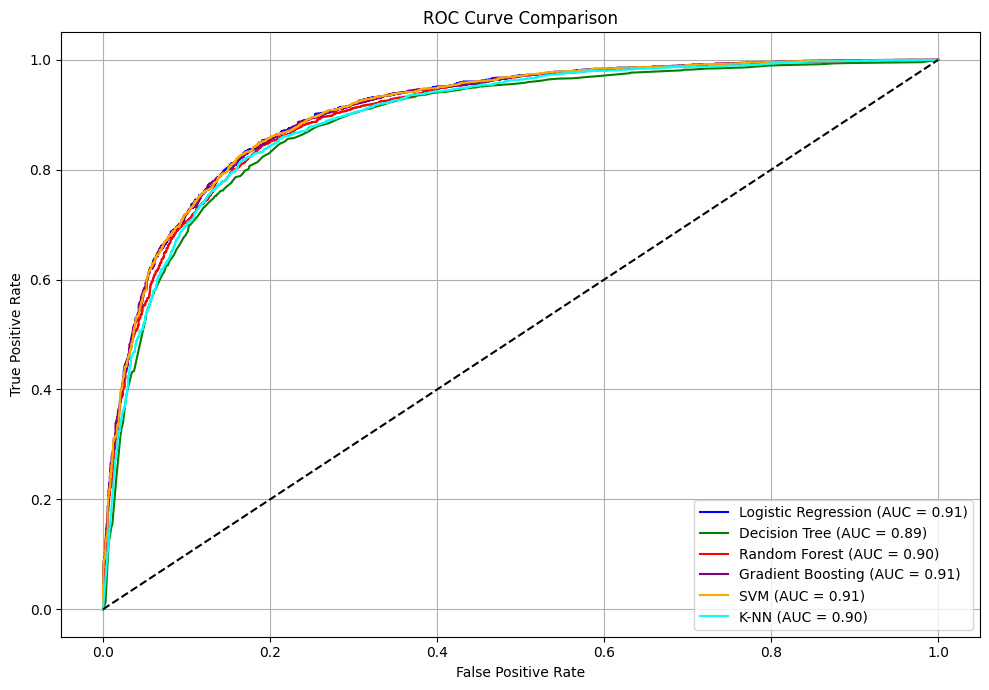

In [53]:

# Initialize plot
plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'brown']

# Plot ROC Curve
for i, (name, model) in enumerate(Models.items()):
    if name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(x_test)[:, 1]
        else:
            continue  # Skip models without predict_proba
    else:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(x_test_scaled)[:, 1]
        elif hasattr(model, "decision_function"):  # For SVM
            y_score = model.decision_function(x_test_scaled)
        else:
            continue

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = roc_auc_score(y_test, y_score)

    # Plot ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})", color=colors[i % len(colors)])

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right', fontsize='medium', frameon=True)
plt.grid(True)
plt.tight_layout()
plt.show()

**📌 Insights**

* **📈 ROC Curve Insight:**
The ROC Curve shows that Logistic Regression, Gradient Boosting, and SVM all achieved the highest AUC score of 0.91, indicating excellent ability to distinguish between classes. Random Forest and K-NN closely followed with an AUC of 0.90, while Decision Tree had a slightly lower performance at 0.89.

* **Logistic Regression**maintains its lead as a top performer, not only in accuracy but also in classification capability as reflected by the high AUC.

* All models perform well, but Logistic Regression, Gradient Boosting, and SVM are best for scenarios requiring strong classification power with balanced sensitivity and specificity.

# **Pipeline for Machine Learning**

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import joblib


# Features and target
X = data_cleaned.drop(columns=['Depression'])
y = data_cleaned['Depression']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify feature types
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()

# Save for future use
joblib.dump(num_features, 'num_features.pkl')
joblib.dump(cat_features, 'cat_features.pkl')
joblib.dump(X_train.columns.tolist(), 'train_columns.pkl')

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_features),

    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_features)
])

# Classifier
model = LogisticRegression(solver='saga', penalty='elasticnet', max_iter=200, l1_ratio=0.5, C=1291.55)

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit
pipeline.fit(X_train, y_train)

# Save model
joblib.dump(pipeline, 'Logistic_Regression_pipeline.pkl')
print("✅ Model trained and pipeline saved.")

✅ Model trained and pipeline saved.


**📌 Insights**

**Pipeline Overview and Persistence**

To ensure consistency and ease of deployment, the entire machine learning workflow—including data preprocessing and model training—was encapsulated into a Scikit-learn `Pipeline`.

**Steps Included:**
- Imputation of missing values (mean for numerical, most frequent for categorical)
- Feature scaling with `StandardScaler`
- One-hot encoding for categorical variables
- Gradient Boosting Classifier as the estimator

** Pipeline Persistence:**
The trained pipeline was saved using `joblib` to allow future reuse without retraining.



# **Load the Saved Pipeline -  Load & Prepare Unseen Data**

In [56]:
# Load pipeline & config
pipeline = joblib.load('Logistic_Regression_pipeline.pkl')
num_features = joblib.load('num_features.pkl')
cat_features = joblib.load('cat_features.pkl')
train_columns = joblib.load('train_columns.pkl')

# Load unseen data
unseen_data = pd.read_csv("Unseen_data.csv")
unseen_data.head()

,Age,Gender,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Sleep Duration,Dietary,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
0,28,F,Educational Consultant,1.0,5.0,8.7,4.0,4.0,4.0,3.0,More than 8 hours,Unhealthy,Yes,No,0
1,32,M,Lawyer,4.0,2.0,6.3,2.0,3.0,1.0,2.0,5-6 hours,Unhealthy,Yes,No,1
2,28,F,Student,5.0,2.0,6.5,3.0,3.0,7.0,2.0,Others,Healthy,Yes,Yes,1
3,39,M,Entrepreneur,4.0,5.0,7.0,2.0,4.0,7.0,2.0,More than 8 hours,Moderate,No,Yes,1
4,18,M,Lawyer,1.0,4.0,6.7,4.0,3.0,3.0,1.0,7-8 hours,Moderate,No,No,1


In [57]:
unseen_data.shape

(14, 15)

In [58]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    14 non-null     int64  
 1   Gender                                 14 non-null     object 
 2   Profession                             14 non-null     object 
 3   Academic Pressure                      14 non-null     float64
 4   Work Pressure                          14 non-null     float64
 5   CGPA                                   14 non-null     float64
 6   Study Satisfaction                     14 non-null     float64
 7   Job Satisfaction                       14 non-null     float64
 8   Work/Study Hours                       14 non-null     float64
 9   Financial Stress                       14 non-null     float64
 10  Sleep Duration                         14 non-null     object 
 11  Dietary 

# **Make Predictions**

In [60]:
# Add any missing columns from training
for col in train_columns:
    if col not in unseen_data.columns:
        unseen_data[col] = np.nan

# Drop extra columns not seen during training
unseen_data = unseen_data[train_columns]

# Fix dtypes
unseen_data.loc[:, num_features] = unseen_data[num_features].apply(pd.to_numeric, errors='coerce')
unseen_data[cat_features] = unseen_data[cat_features].astype(str)

# Predict
# Predict
unseen_predictions = pipeline.predict(unseen_data)
print('✅ Predictions:', unseen_predictions.tolist())

✅ Predictions: [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1]


# **📌 Final Conclusion**
Logistic Regression emerged as the most reliable and interpretable model, achieving the highest metrics across accuracy, F1-score, and ROC-AUC. Its balance between simplicity and performance makes it the ideal choice for predicting depression in students based on academic, lifestyle, and mental health indicators.